In [863]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import sklearn
print(sklearn.__version__)

0.19.1


In [143]:
bucket='dxl-demo'
data_key = 'customer.csv'
data_location = 'S3://{}/{}'.format(bucket, data_key)
print(data_location)

S3://dxl-demo/customer.csv


In [144]:
df_cust = pd.read_csv(data_location, low_memory=False)
df_cust.head()

,customer_id,language_code,marital_status,status,create_date,last_update_date,head_of_household_flag,Gender,CreateMonth,CreateYear,...,attribute_grouping_code,Loyalty.attribute_code,loyalty_status,CustomerCount,LoyaltyCount,active_address_id,create_source,no_mailings,email_indicator,opt_in_flag
0,34291241,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
1,34291245,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
2,34291821,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
3,34291953,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
4,34292392,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0


In [145]:
cfile_name='customer-cltv.csv'
cfile='S3://{}/{}'.format(bucket,cfile_name)
df1_cust = pd.read_csv(cfile)
df1_cust.head()

,customer_id,language_code,marital_status,status,create_date,last_update_date,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,opt_in_flag,email_available_ind
0,34291241,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,364,BRNZE,1,W1818,0.0,1
1,34291245,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,364,BRNZE,1,W1818,0.0,1
2,34291821,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,364,BRNZE,1,W1818,0.0,1
3,34291953,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,364,BRNZE,1,W1818,0.0,1
4,34292392,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,364,BRNZE,1,W1818,0.0,1


In [4]:
tfile_name = 'transactions_header.csv'
tfile='S3://{}/{}'.format(bucket,tfile_name)
print(tfile)

S3://dxl-demo/transactions_header.csv


In [64]:
df_txions_head = pd.read_csv(tfile)

In [65]:
### 7.6M transactions 
df_txions_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656980 entries, 0 to 7656979
Data columns (total 8 columns):
customer_id                 int64
transaction_id              int64
transaction_date            object
total_net_retail            float64
no_transaction_lines        int64
total_net_retail_central    float64
currency_code               object
posted_date                 object
dtypes: float64(2), int64(3), object(3)
memory usage: 467.3+ MB


In [66]:
df_txions_head.head()

,customer_id,transaction_id,transaction_date,total_net_retail,no_transaction_lines,total_net_retail_central,currency_code,posted_date
0,26023412,85453013,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:05:00.000
1,31579704,85453015,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:05:00.000
2,5538423,85453043,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:05:00.000
3,27035579,85453109,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:06:00.000
4,19737645,85453231,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:06:00.000


In [67]:
df_txions_head.head()

,customer_id,transaction_id,transaction_date,total_net_retail,no_transaction_lines,total_net_retail_central,currency_code,posted_date
0,26023412,85453013,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:05:00.000
1,31579704,85453015,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:05:00.000
2,5538423,85453043,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:05:00.000
3,27035579,85453109,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:06:00.000
4,19737645,85453231,2018-08-18 00:00:00.000,35.0,1,35.0,USD,2018-08-19 02:06:00.000


In [905]:
df_txions_head['total_net_retail'].sum()

855491944.1499994

In [68]:
df_txions_head['transaction_date_dt'] = pd.to_datetime(df_txions_head['transaction_date'])
df_txions_head = df_txions_head.sort_values(by=['customer_id','transaction_date_dt'])

In [69]:
df_txions_head.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656980 entries, 7245255 to 1099864
Data columns (total 9 columns):
customer_id                 int64
transaction_id              int64
transaction_date            object
total_net_retail            float64
no_transaction_lines        int64
total_net_retail_central    float64
currency_code               object
posted_date                 object
transaction_date_dt         datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 584.2+ MB


In [72]:
df_txions_filter = df_txions_head.filter(['customer_id', 'transaction_date_dt'])
df_txions_filter.head()

,customer_id,transaction_date_dt
7245255,215,2017-05-15
6679078,215,2017-06-06
7140043,215,2017-06-06
7294199,215,2017-06-06
6638452,215,2017-06-18


In [75]:
df_txions_filter['txion_date_diff'] = df_txions_filter.groupby('customer_id')['transaction_date_dt'].diff() / np.timedelta64(1, 'D')
df_txions_filter['txion_date_diff'] = df_txions_filter['txion_date_diff'].fillna(0)

,customer_id,transaction_date_dt,diff
7245255,215,2017-05-15,0.0
6679078,215,2017-06-06,22.0
7140043,215,2017-06-06,0.0
7294199,215,2017-06-06,0.0
6638452,215,2017-06-18,12.0


In [76]:
df_txions_filter.head(20)

,customer_id,transaction_date_dt,diff
7245255,215,2017-05-15,0.0
6679078,215,2017-06-06,22.0
7140043,215,2017-06-06,0.0
7294199,215,2017-06-06,0.0
6638452,215,2017-06-18,12.0
6712484,215,2017-07-17,29.0
6812271,215,2017-07-17,0.0
6564382,215,2017-11-02,108.0
6449957,215,2017-11-07,5.0
2108343,215,2017-12-26,49.0


In [77]:
df_txions_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656980 entries, 7245255 to 1099864
Data columns (total 3 columns):
customer_id            int64
transaction_date_dt    datetime64[ns]
diff                   float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 553.7 MB


In [78]:
df_txions_head.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656980 entries, 7245255 to 1099864
Data columns (total 9 columns):
customer_id                 int64
transaction_id              int64
transaction_date            object
total_net_retail            float64
no_transaction_lines        int64
total_net_retail_central    float64
currency_code               object
posted_date                 object
transaction_date_dt         datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 904.2+ MB


In [81]:
df_txions_merge=pd.merge(df_txions_head, df_txions_filter, on=['customer_id', 'transaction_date_dt'], how='left')
df_txions_merge.head(20)

,customer_id,transaction_id,transaction_date,total_net_retail,no_transaction_lines,total_net_retail_central,currency_code,posted_date,transaction_date_dt,diff
0,215,79873867,2017-05-15 00:00:00.000,115.00,3,115.00,USD,2017-05-17 05:10:00.000,2017-05-15,0.0
1,215,80161440,2017-06-06 00:00:00.000,35.00,1,35.00,USD,2017-06-09 04:08:00.000,2017-06-06,22.0
2,215,80161440,2017-06-06 00:00:00.000,35.00,1,35.00,USD,2017-06-09 04:08:00.000,2017-06-06,0.0
3,215,80161440,2017-06-06 00:00:00.000,35.00,1,35.00,USD,2017-06-09 04:08:00.000,2017-06-06,0.0
4,215,80143013,2017-06-06 00:00:00.000,80.00,2,80.00,USD,2017-06-08 04:05:00.000,2017-06-06,22.0
5,215,80143013,2017-06-06 00:00:00.000,80.00,2,80.00,USD,2017-06-08 04:05:00.000,2017-06-06,0.0
6,215,80143013,2017-06-06 00:00:00.000,80.00,2,80.00,USD,2017-06-08 04:05:00.000,2017-06-06,0.0
7,215,80129707,2017-06-06 00:00:00.000,-115.00,3,-115.00,USD,2017-06-07 04:31:00.000,2017-06-06,22.0
8,215,80129707,2017-06-06 00:00:00.000,-115.00,3,-115.00,USD,2017-06-07 04:31:00.000,2017-06-06,0.0
9,215,80129707,2017-06-06 00:00:00.000,-115.00,3,-115.00,USD,2017-06-07 04:31:00.000,2017-06-06,0.0


In [628]:
df_txions_merge = df_txions_merge.drop_duplicates(subset=['customer_id', 'transaction_id'])

In [906]:
df_txions_merge['total_net_retail'].sum()

855491944.1499994

In [629]:
df_txions_merge[df_txions_merge['customer_id'] == 33868554]

,customer_id,transaction_id,total_net_retail,no_transaction_lines,total_net_retail_central,transaction_date_dt,diff
8285674,33868554,81457823,224.32,2,224.32,2017-10-01,0.0
8285676,33868554,81453093,518.55,5,518.55,2017-10-01,0.0


In [632]:
df_txions_merge.drop(['transaction_date', 'currency_code', 'posted_date'], axis=1, inplace=True)

In [634]:
df_txions_merge = df_txions_merge.fillna(0)

In [635]:
df_txions_merge[df_txions_merge['diff'] < 0].head()

,customer_id,transaction_id,total_net_retail,no_transaction_lines,total_net_retail_central,transaction_date_dt,diff


In [636]:
df_txions_merge[df_txions_merge['customer_id'] == 222]

,customer_id,transaction_id,total_net_retail,no_transaction_lines,total_net_retail_central,transaction_date_dt,diff
21,222,78945046,30.0,1,30.0,2017-02-19,0.0
23,222,78965348,30.0,1,30.0,2017-02-19,0.0


In [637]:
df_txions_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656980 entries, 0 to 10007605
Data columns (total 7 columns):
customer_id                 int64
transaction_id              int64
total_net_retail            float64
no_transaction_lines        int64
total_net_retail_central    float64
transaction_date_dt         datetime64[ns]
diff                        float64
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 467.3 MB


In [638]:
(df_txions_merge['customer_id'].value_counts()>1).sum()

1348242

In [639]:
df_txions_merge[df_txions_merge['customer_id'] == 364]

,customer_id,transaction_id,total_net_retail,no_transaction_lines,total_net_retail_central,transaction_date_dt,diff
27,364,78743692,228.98,4,228.98,2017-01-31,0.0
28,364,79047442,59.50,1,59.50,2017-03-03,31.0
29,364,79717029,28.32,1,28.32,2017-04-29,57.0
32,364,79756205,28.68,1,28.68,2017-04-29,57.0
35,364,79704805,22.50,1,22.50,2017-04-29,57.0
38,364,80067881,139.48,4,139.48,2017-05-31,32.0
39,364,80480526,79.48,3,79.48,2017-06-30,30.0
40,364,80976350,59.50,1,59.50,2017-08-11,42.0
42,364,80943338,79.48,3,79.48,2017-08-11,42.0
44,364,82454933,59.50,1,59.50,2017-12-16,127.0


In [640]:
%%time
df_txions_group = df_txions_merge.groupby('customer_id').agg(
    {
        'total_net_retail':'sum',
        'no_transaction_lines':'sum',
        'transaction_id':'count',
        'diff':'mean',
        'transaction_date_dt':lambda x:(pd.to_datetime('12-31-2018') - x.max()) / np.timedelta64(1, 'D')
    }
).round().reset_index()
df_txions_group.head()

CPU times: user 10min 53s, sys: 19.5 s, total: 11min 13s
Wall time: 10min 53s


In [641]:
df_txions_group.head()

,customer_id,total_net_retail,no_transaction_lines,transaction_id,diff,transaction_date_dt
0,215,722.0,33,13,48.0,44.0
1,222,60.0,2,2,0.0,680.0
2,255,200.0,8,2,106.0,9.0
3,364,1411.0,40,21,49.0,25.0
4,420,178.0,3,1,0.0,268.0


In [645]:
df_txions_group = df_txions_group.rename(columns={
                                                    'total_net_retail':'Total Revenue',
                                                    'no_transaction_lines':'No of Items Purchased',
                                                    'transaction_id':'No of Txions',
                                                    'diff':'Av Days Between Purchases',
                                                    'transaction_date_dt':'Recency Days'
                                                 })
df_txions_group.head()

,customer_id,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days
0,215,722.0,33,13,48.0,44.0
1,222,60.0,2,2,0.0,680.0
2,255,200.0,8,2,106.0,9.0
3,364,1411.0,40,21,49.0,25.0
4,420,178.0,3,1,0.0,268.0


In [646]:
## No dupes
(df_txions_group['customer_id'].value_counts()>1).sum()

0

In [907]:
df_txions_group['Total Revenue'].sum()

858380930.0

In [647]:
df_cust.describe(include='all')

,customer_id,language_code,marital_status,status,create_date,last_update_date,head_of_household_flag,Gender,CreateMonth,CreateYear,...,attribute_grouping_code,Loyalty.attribute_code,loyalty_status,CustomerCount,LoyaltyCount,active_address_id,create_source,no_mailings,email_indicator,opt_in_flag
count,1.113654e+06,1113654,1113654,1113654,1113654,1113654,1.113652e+06,1113654,1113654,1.113654e+06,...,847524,847524,1113654,1113654.0,1.113654e+06,1.113654e+06,1112406,1113654.0,1.113490e+06,1.113653e+06
unique,NaN,5,5,3,1173,3329,NaN,3,24,NaN,...,1,4,5,NaN,NaN,NaN,389,NaN,NaN,NaN
top,NaN,ENG,U,A,2017-06-12 00:00:00.000,2017-10-27 00:00:00.000,NaN,M,2017-06-01 00:00:00.000,NaN,...,TIER,BRNZE,BRNZE,NaN,NaN,NaN,W1818,NaN,NaN,NaN
freq,NaN,1111104,1113523,1113647,6118,91689,NaN,665432,74011,NaN,...,847524,683926,683926,NaN,NaN,NaN,179639,NaN,NaN,NaN
mean,3.435758e+07,NaN,NaN,NaN,NaN,NaN,7.183743e-01,NaN,NaN,2.017462e+03,...,NaN,NaN,NaN,1113654.0,2.235351e+00,8.834162e-01,NaN,0.0,5.043333e+00,6.485862e-03
std,7.022138e+05,NaN,NaN,NaN,NaN,NaN,4.605164e-01,NaN,NaN,4.985768e-01,...,NaN,NaN,NaN,0.0,1.697317e+00,3.254774e-01,NaN,0.0,4.466988e+00,8.203261e-02
min,3.314035e+07,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.017000e+03,...,NaN,NaN,NaN,1113654.0,1.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00
25%,3.377519e+07,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.017000e+03,...,NaN,NaN,NaN,1113654.0,1.000000e+00,1.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00
50%,3.430697e+07,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.017000e+03,...,NaN,NaN,NaN,1113654.0,1.000000e+00,1.000000e+00,NaN,0.0,9.000000e+00,0.000000e+00
75%,3.496202e+07,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.018000e+03,...,NaN,NaN,NaN,1113654.0,4.000000e+00,1.000000e+00,NaN,0.0,9.000000e+00,0.000000e+00


In [648]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113654 entries, 0 to 1113653
Data columns (total 22 columns):
customer_id                1113654 non-null int64
language_code              1113654 non-null object
marital_status             1113654 non-null object
status                     1113654 non-null object
create_date                1113654 non-null object
last_update_date           1113654 non-null object
head_of_household_flag     1113652 non-null float64
Gender                     1113654 non-null object
CreateMonth                1113654 non-null object
CreateYear                 1113654 non-null int64
TenurewDXL                 1113654 non-null int64
TenureGroup                1113654 non-null object
attribute_grouping_code    847524 non-null object
Loyalty.attribute_code     847524 non-null object
loyalty_status             1113654 non-null object
CustomerCount              1113654 non-null int64
LoyaltyCount               1113654 non-null int64
active_address_id         

In [780]:
## TenurewDXL represents create_date and last_update_date So remove all create/last update dates
df_cust_drop = df_cust.drop(['create_date', 'last_update_date', 'CreateMonth','CreateYear','TenureGroup', 'CustomerCount', 'LoyaltyCount', 'attribute_grouping_code', 'no_mailings', 'Loyalty.attribute_code'],axis=1)

In [781]:
df_cust_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113654 entries, 0 to 1113653
Data columns (total 12 columns):
customer_id               1113654 non-null int64
language_code             1113654 non-null object
marital_status            1113654 non-null object
status                    1113654 non-null object
head_of_household_flag    1113652 non-null float64
Gender                    1113654 non-null object
TenurewDXL                1113654 non-null int64
loyalty_status            1113654 non-null object
active_address_id         1113654 non-null int64
create_source             1112406 non-null object
email_indicator           1113490 non-null float64
opt_in_flag               1113653 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 102.0+ MB


In [782]:
df_cust_drop.isnull().sum()

customer_id                  0
language_code                0
marital_status               0
status                       0
head_of_household_flag       2
Gender                       0
TenurewDXL                   0
loyalty_status               0
active_address_id            0
create_source             1248
email_indicator            164
opt_in_flag                  1
dtype: int64

In [783]:
df_cust_drop['create_source'] = df_cust_drop['create_source'].apply(lambda x:str(x).replace('NaN', 'UNKNOWN'))

In [784]:
df_cust_drop['create_source'].isnull().sum()

0

In [153]:
df_cust_drop['create_source'].value_counts()

W1818         179639
ATG           111664
RSPS          106675
STR13          62657
W2222          35909
WEB06          28032
ISEUNKNOWN     15358
POS9381         3336
POS9413         3279
POS9731         3249
POS9856         3216
POS9625         3126
POS9930         3118
POS9155         3100
POS9076         3066
ECOM            2948
POS9685         2841
POS9540         2780
POS9890         2771
W1919           2749
POS9728         2730
POS9933         2700
POS9867         2687
W2323           2681
POS9714         2676
POS9160         2661
POS9375         2604
POS9869         2602
POS9211         2577
POS9920         2567
               ...  
POS9207          298
POS7934          287
WEB08            285
POS7708          282
POS5018          264
POS7872          253
POS9444          230
POS7412          180
POS9401          166
POS9795          114
W2424            108
POS9999           95
POS9689           89
POS9144           59
POS9691           59
POS9336           58
POS9523      

In [785]:
df_cust_drop['create_source'] = df_cust_drop.create_source.str.replace('POS[0-9]+','POS')
df_cust_drop['create_source'] = df_cust_drop.create_source.str.replace('W[0-9]+','W')
df_cust_drop['create_source'] = df_cust_drop.create_source.str.replace('CAT[0-9]+','CAT')
df_cust_drop['create_source'] = df_cust_drop.create_source.str.replace('WEB[0-9]+','WEB')
df_cust_drop['create_source'] = df_cust_drop['create_source'].replace('ISE_*','ISE', regex = True)
df_cust_drop['create_source'] = df_cust_drop['create_source'].replace('ISE[A-Z]*','ISE', regex = True)
df_cust_drop['create_source'] = df_cust_drop['create_source'].replace('ISE\W+','ISE', regex = True)
df_cust_drop['create_source'] = df_cust_drop['create_source'].replace('ISE[a-z]*','ISE', regex = True)

In [786]:
df_cust_drop['create_source'].value_counts()

POS         558942
W           221087
ATG         111664
RSPS        106675
STR13        62657
WEB          28318
ISE          17250
ECOM          2948
FIFTYONE      2160
nan           1248
CAT            703
RBT_08           1
99999            1
Name: create_source, dtype: int64

In [787]:
df_cust_drop['email_indicator'].unique()

array([ 0.,  9.,  1., nan])

In [788]:
df_cust_drop['email_indicator'] = df_cust_drop['email_indicator'].apply(lambda x:str(x).replace('nan', '0.0'))

In [789]:
df_cust_drop['email_indicator'].unique()

array(['0.0', '9.0', '1.0'], dtype=object)

In [790]:
df_cust_drop = df_cust_drop.fillna(0)

In [791]:
df_cust_drop.isnull().sum()

customer_id               0
language_code             0
marital_status            0
status                    0
head_of_household_flag    0
Gender                    0
TenurewDXL                0
loyalty_status            0
active_address_id         0
create_source             0
email_indicator           0
opt_in_flag               0
dtype: int64

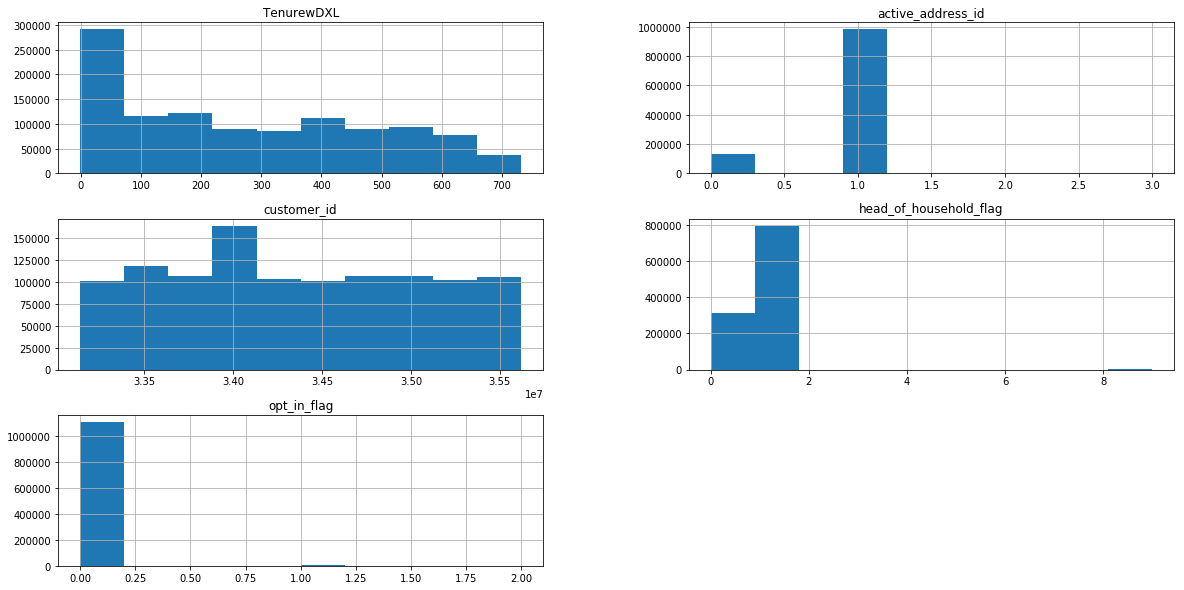

In [161]:
df_cust_drop.hist(figsize=(20,10))
plt.show()

In [792]:
df2 = df1_cust.filter(['customer_id', 'email_available_ind'])
df2.head()

,customer_id,email_available_ind
0,34291241,1
1,34291245,1
2,34291821,1
3,34291953,1
4,34292392,1


In [793]:
df_cust_merge = pd.merge(df_cust_drop,
                 df2,
                 on='customer_id', 
                 how='left')

In [794]:
df_cust_merge.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind
0,34291241,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1
1,34291245,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1
2,34291821,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1
3,34291953,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1
4,34292392,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1


In [795]:
df_cust_merge['email_available_ind'].value_counts()

1    889123
0    224531
Name: email_available_ind, dtype: int64

In [796]:
df_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113654 entries, 0 to 1113653
Data columns (total 13 columns):
customer_id               1113654 non-null int64
language_code             1113654 non-null object
marital_status            1113654 non-null object
status                    1113654 non-null object
head_of_household_flag    1113654 non-null float64
Gender                    1113654 non-null object
TenurewDXL                1113654 non-null int64
loyalty_status            1113654 non-null object
active_address_id         1113654 non-null int64
create_source             1113654 non-null object
email_indicator           1113654 non-null object
opt_in_flag               1113654 non-null float64
email_available_ind       1113654 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 119.0+ MB


In [797]:
df_txions_group[df_txions_group['Recency Days'] < 0 ]

,customer_id,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days


In [798]:
## Change all non-negative values to 0
df_txions_group[df_txions_group < 0] = 0

In [656]:
df_txions_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285220 entries, 0 to 2285219
Data columns (total 6 columns):
customer_id                  int64
Total Revenue                float64
No of Items Purchased        int64
No of Txions                 int64
Av Days Between Purchases    float64
Recency Days                 float64
dtypes: float64(3), int64(3)
memory usage: 104.6 MB


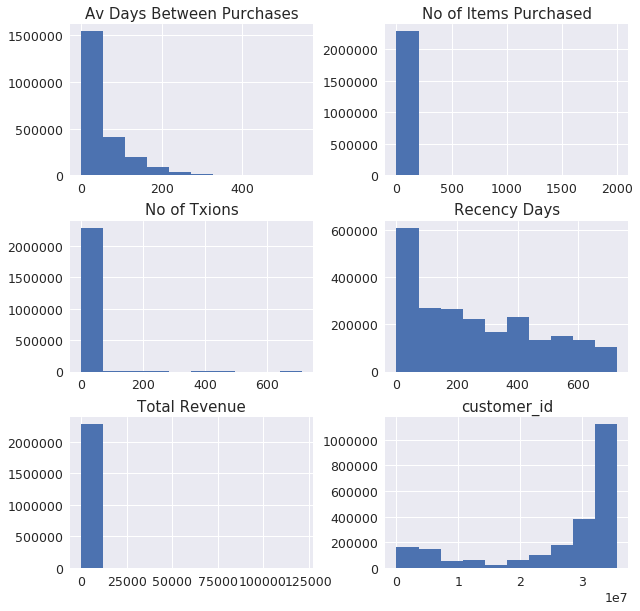

In [657]:
df_txions_group.hist(figsize=(10,10))
plt.show()

In [799]:
df_cust_txions = pd.merge(df_cust_merge, df_txions_group, how='inner', on='customer_id')

In [908]:
df_cust_txions['Total Revenue'].sum()

219877108.0

In [800]:
df_cust_txions.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days
0,34291241,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1,119.0,2,2,166.0,55.0
1,34291245,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1,89.0,3,1,0.0,385.0
2,34291821,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1,80.0,1,1,0.0,386.0
3,34291953,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1,293.0,7,3,122.0,26.0
4,34292392,ENG,U,A,1.0,F,364,BRNZE,1,W,0.0,0.0,1,60.0,4,1,0.0,387.0


In [801]:
df_cust_txions['Items Purchased Per Visit'] = (df_cust_txions['No of Items Purchased'] / df_cust_txions['No of Txions']).round()

In [802]:
 df_cust_txions[df_cust_txions['Total Revenue'].isnull()]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit


In [803]:
 df_cust_txions[df_cust_txions['No of Items Purchased'].isnull()]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit


In [804]:
df_cust_txions['Av. Price Per Item'] = (df_cust_txions['Total Revenue'] / df_cust_txions['No of Items Purchased']).round()

In [805]:
df_cust_txions['Av. Price Per Item'] = df_cust_txions['Av. Price Per Item'].fillna(0)

In [806]:
df_cust_txions[df_cust_txions['Av. Price Per Item'].isnull()]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item


In [807]:
df_cust_txions['AOV'] = df_cust_txions['Total Revenue']/df_cust_txions['No of Txions'].round(0)

In [808]:
df_cust_txions[df_cust_txions.isnull().any(axis=1)]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,...,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV


In [809]:
#Make sure that the number of customers are unique
print("Number of unique customers : ",df_cust_txions.customer_id.nunique(), " out of total rows : ",df_cust_txions.shape[0])

Number of unique customers :  918196  out of total rows :  918196


### Get basic metrics about the data - AOV, Yearly Value, Av. Revenue Per Customer, Av. Txions Per Cust 

In [870]:
df_cust_txions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918196 entries, 0 to 918195
Data columns (total 21 columns):
customer_id                  918196 non-null int64
language_code                918196 non-null object
marital_status               918196 non-null object
status                       918196 non-null object
head_of_household_flag       918196 non-null float64
Gender                       918196 non-null object
TenurewDXL                   918196 non-null int64
loyalty_status               918196 non-null object
active_address_id            918196 non-null int64
create_source                918196 non-null object
email_indicator              918196 non-null object
opt_in_flag                  918196 non-null float64
email_available_ind          918196 non-null int64
Total Revenue                918196 non-null float64
No of Items Purchased        918196 non-null int64
No of Txions                 918196 non-null int64
Av Days Between Purchases    918196 non-null float64
Recency

In [850]:
df_cust_txions['AOV'].mean()

116.64242838583696

In [853]:
## Revenue Per Year. As this is a mean, I don't need to divide it
(df_cust_txions['Total Revenue']).mean()

239.46641893451942

In [854]:
## This is Yearly Value to DXL  Half of Revenue Per Customer. As its a mean I don't need to divide it by Year
(df_cust_txions['Total Revenue']*0.45).mean()

107.75988852047806

In [778]:
df_cust_txions['customer_id'].nunique()

918196

In [779]:
sum(df_cust_txions['Total Revenue']) / (df_cust_txions['customer_id'].nunique())

239.46641893451942

In [810]:
df_cust_txions['No of Txions'].mean()

2.1220861341151562

In [855]:
(df_cust_txions.groupby('loyalty_status')['AOV'].mean()).to_frame()

,AOV
loyalty_status,
BRNZE,97.331329
GOLD,236.112539
PLATN,336.225128
REGULAR,66.288784
SVLRE,192.718575


In [873]:
df_cust.head()

,customer_id,language_code,marital_status,status,create_date,last_update_date,head_of_household_flag,Gender,CreateMonth,CreateYear,...,attribute_grouping_code,Loyalty.attribute_code,loyalty_status,CustomerCount,LoyaltyCount,active_address_id,create_source,no_mailings,email_indicator,opt_in_flag
0,34291241,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
1,34291245,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
2,34291821,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
3,34291953,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0
4,34292392,ENG,U,A,2017-12-12 00:00:00.000,2018-12-11 11:50:00.000,1.0,F,2017-12-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,W1818,0,0.0,0.0


In [882]:
df_cust_temp = pd.merge(df_cust_txions, df_cust, on='customer_id', how='left')
#result = pd.merge(left, right[['key1','key2','C']], on=['key1', 'key2'])
#df_cust_temp =  df_cust_txions.merge(df_cust[['CreateYear']], on='customer_id', how='left')
#df_cust_temp.head()
df_cust_temp.groupby(['loyalty_status_x', 'CreateYear'])['Total Revenue'].mean().to_frame()

Total Revenue
loyalty_status_x CreateYear               
BRNZE            2017           168.576094
                 2018           116.825070
GOLD             2017           872.497844
                 2018           765.328442
PLATN            2017          1906.284214
                 2018          1622.175078
REGULAR          2017            93.410770
                 2018            85.134198
SVLRE            2017           486.786013
                 2018           416.745588

In [894]:
df_cust_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918196 entries, 0 to 918195
Data columns (total 42 columns):
customer_id                  918196 non-null int64
language_code_x              918196 non-null object
marital_status_x             918196 non-null object
status_x                     918196 non-null object
head_of_household_flag_x     918196 non-null float64
Gender_x                     918196 non-null object
TenurewDXL_x                 918196 non-null int64
loyalty_status_x             918196 non-null object
active_address_id_x          918196 non-null int64
create_source_x              918196 non-null object
email_indicator_x            918196 non-null object
opt_in_flag_x                918196 non-null float64
email_available_ind          918196 non-null int64
Total Revenue                918196 non-null float64
No of Items Purchased        918196 non-null int64
No of Txions                 918196 non-null int64
Av Days Between Purchases    918196 non-null float64
Recency

In [888]:
df_cust_txions['customer_id'].nunique()

918196

In [887]:
df_cust_temp['customer_id'].nunique()

918196

In [899]:
df_cust_temp.groupby(['loyalty_status_x','CreateYear']).agg(
    {
        'customer_id':'count',
        'No of Txions':'mean',
        'AOV': 'mean',
        'Av Days Between Purchases':'mean',
        'Items Purchased Per Visit':'mean',
        'Total Revenue':
        {
            'Total Mean Revenue': 'mean',
            'Yearly Value to DXL': lambda x:(0.45*x).mean()
        },
    }
).astype('int64').reset_index()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


loyalty_status_x CreateYear customer_id No of Txions  AOV  \
                                    count         mean mean   
0            BRNZE       2017      353243            1  103   
1            BRNZE       2018      326691            1   90   
2             GOLD       2017       21334            6  186   
3             GOLD       2018       15811            3  302   
4            PLATN       2017       13810           10  270   
5            PLATN       2018        7391            6  458   
6          REGULAR       2017       27855            1   63   
7          REGULAR       2018       48473            1   67   
8            SVLRE       2017       46185            4  151   
9            SVLRE       2018       57403            2  225   

  Av Days Between Purchases Items Purchased Per Visit      Total Revenue  \
                       mean                      mean Total Mean Revenue   
0                        29                         2                168   
1                         6                         2                116   
2                        71                         3                872   
3                        27                         5                765   
4                        58                         4               1906   
5                        28                         6               1622   
6                        15                         1                 93   
7                         4                         1                 85   
8                        80                         3                486   
9                        23                         4                416   

                       
  Yearly Value to DXL  
0                  75  
1                  52  
2                 392  
3                 344  
4                 857  
5                 729  
6                  42  
7                  38  
8                 219  
9                 187

In [909]:
df_cust_txions.groupby('loyalty_status').agg(
    {
        'customer_id':'count',
        'No of Txions':'mean',
        'Av Days Between Purchases':'mean',
        'Items Purchased Per Visit':'mean',
        'AOV': 'mean',
        'Total Revenue':
        {
            'Total Revenue': 'sum',
            'Total Mean Revenue': 'mean',
            'Yearly Value to DXL': lambda x:(0.45*x).mean()
        },
    }
).round().reset_index()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


loyalty_status customer_id No of Txions Av Days Between Purchases  \
                       count         mean                      mean   
0          BRNZE      679934          2.0                      19.0   
1           GOLD       37145          5.0                      53.0   
2          PLATN       21201          9.0                      48.0   
3        REGULAR       76328          1.0                       8.0   
4          SVLRE      103588          3.0                      49.0   

  Items Purchased Per Visit    AOV Total Revenue                     \
                       mean   mean Total Revenue Total Mean Revenue   
0                       2.0   97.0    97714024.0              144.0   
1                       5.0  236.0    30714477.0              827.0   
2                       6.0  336.0    38315281.0             1807.0   
3                       1.0   66.0     6728667.0               88.0   
4                       4.0  193.0    46404659.0              448.0   

                       
  Yearly Value to DXL  
0                65.0  
1               372.0  
2               813.0  
3                40.0  
4               202.0

In [903]:
df_cust_txions['Av Days Between Purchases'].mean()

23.208984791918066

In [904]:
df_cust_txions['Total Revenue'].sum()

219877108.0

In [898]:
###  Revenue Per Segment Per Year - As its a mean I don't need to look at annually
(df_cust_txions.groupby('loyalty_status')['Av Days Between Purchases'].mean()).to_frame()

,Av Days Between Purchases
loyalty_status,
BRNZE,18.576268
GOLD,52.923247
PLATN,47.619829
REGULAR,8.360824
SVLRE,48.906958


In [859]:
### Yearly Value to DXL
((df_cust_txions.groupby('loyalty_status')['Total Revenue'].mean())*.45).to_frame()

,Total Revenue
loyalty_status,
BRNZE,64.669969
GOLD,372.096235
PLATN,813.257698
REGULAR,39.669586
SVLRE,201.587988


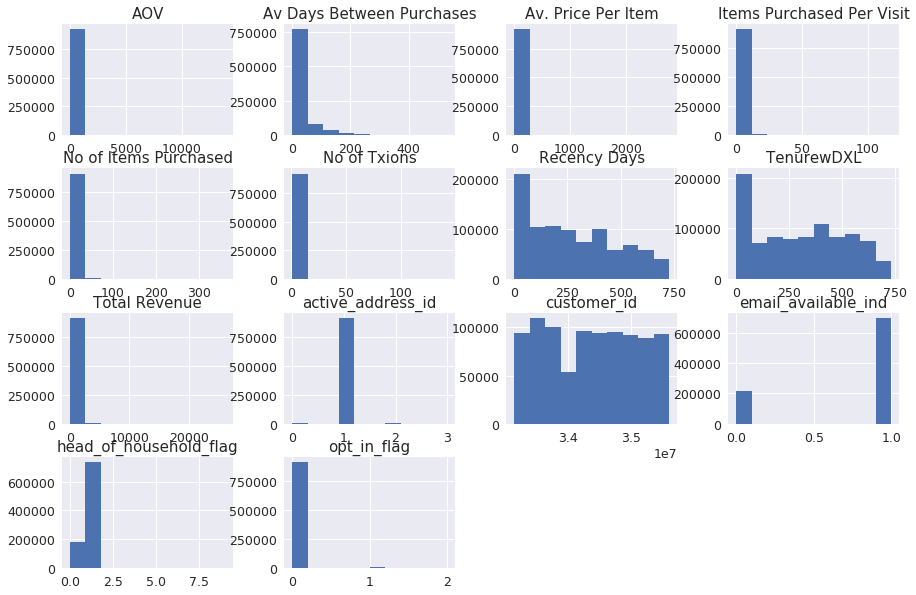

In [669]:
df_cust_txions.hist(figsize=(15,10))
plt.show()

In [670]:
### No columns with constant values
constant_columns = [c for c in df_cust_txions.columns if df_cust_txions[c].nunique()<=1]
print(constant_columns)

[]


In [671]:
df_cust_txions.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV
0,34291241,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,119.0,2,2,166.0,55.0,1.0,60.0,59.500000
1,34291245,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,89.0,3,1,0.0,385.0,3.0,30.0,89.000000
2,34291821,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,80.0,1,1,0.0,386.0,1.0,80.0,80.000000
3,34291953,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,293.0,7,3,122.0,26.0,2.0,42.0,97.666667
4,34292392,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,60.0,4,1,0.0,387.0,4.0,15.0,60.000000


In [672]:
df_cust_txion_trnsfrm = df_cust_txions.copy()

In [673]:
df_cust_txion_trnsfrm['TenurewDXLBin'] = (df_cust_txion_trnsfrm['TenurewDXL'] /100).round()                 
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['TenurewDXLBin'] == 7].head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,...,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV,TenurewDXLBin
11938,34184494,ENG,U,A,1.0,M,701,1,W,0.0,...,1,109.0,5,2,160.0,404.0,2.0,22.0,54.500000,7.0
11947,34215655,ENG,U,A,1.0,M,708,1,W,0.0,...,1,299.0,17,7,84.0,402.0,2.0,18.0,42.714286,7.0
11959,34289111,ENG,U,A,1.0,M,679,1,W,0.0,...,1,145.0,3,3,105.0,386.0,1.0,48.0,48.333333,7.0
11961,34298116,ENG,U,A,1.0,M,652,1,W,0.0,...,1,88.0,6,4,138.0,386.0,2.0,15.0,22.000000,7.0
12431,33220147,ENG,U,A,1.0,U,678,1,W,0.0,...,1,49.0,1,1,0.0,699.0,1.0,49.0,49.000000,7.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


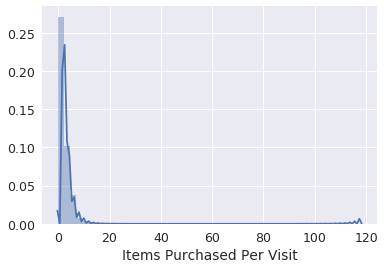

In [674]:
sns.distplot(df_cust_txion_trnsfrm['Items Purchased Per Visit'])

In [675]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['Items Purchased Per Visit'] > 110]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,...,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV,TenurewDXLBin
871244,34626765,ENG,U,A,0.0,U,264,1,POS,9.0,...,1,18597.0,236,2,3.0,278.0,118.0,79.0,9298.5,3.0


In [676]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['Items Purchased Per Visit'] > 10].count()

customer_id                  9936
language_code                9936
marital_status               9936
status                       9936
head_of_household_flag       9936
Gender                       9936
TenurewDXL                   9936
active_address_id            9936
create_source                9936
email_indicator              9936
opt_in_flag                  9936
email_available_ind          9936
Total Revenue                9936
No of Items Purchased        9936
No of Txions                 9936
Av Days Between Purchases    9936
Recency Days                 9936
Items Purchased Per Visit    9936
Av. Price Per Item           9936
AOV                          9936
TenurewDXLBin                9936
dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


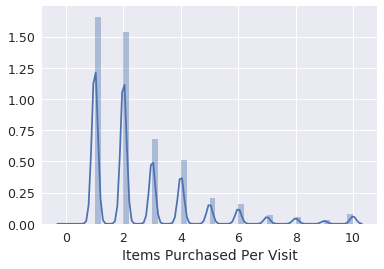

In [677]:
df_cust_txion_trnsfrm['Items Purchased Per Visit'] = np.clip(df_cust_txion_trnsfrm['Items Purchased Per Visit'], a_min=0, a_max=10)
sns.distplot(df_cust_txion_trnsfrm['Items Purchased Per Visit'])

In [678]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['Items Purchased Per Visit'] > 9].head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,...,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV,TenurewDXLBin
610,34299599,ENG,U,A,1.0,F,364,1,W,0.0,...,1,295.0,13,1,0.0,385.0,10.0,23.0,295.000000,4.0
2267,34312860,ENG,U,A,1.0,F,362,1,W,0.0,...,1,265.0,11,1,0.0,383.0,10.0,24.0,265.000000,4.0
2644,34311444,ENG,U,A,1.0,M,362,1,W,0.0,...,1,0.0,40,4,13.0,333.0,10.0,0.0,0.000000,4.0
3092,34274068,ENG,U,A,1.0,F,368,1,W,0.0,...,1,250.0,51,3,7.0,370.0,10.0,5.0,83.333333,4.0
6299,34116915,ENG,U,A,1.0,F,405,1,W,0.0,...,1,207.0,19,2,10.0,406.0,10.0,11.0,103.500000,4.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


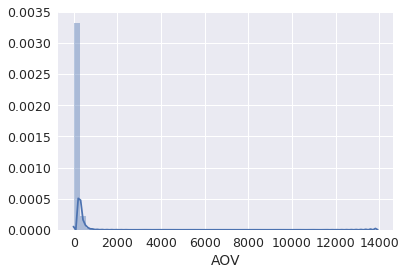

In [679]:
sns.distplot(df_cust_txion_trnsfrm['AOV'])

In [680]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['AOV'] > 500].count()

customer_id                  14731
language_code                14731
marital_status               14731
status                       14731
head_of_household_flag       14731
Gender                       14731
TenurewDXL                   14731
active_address_id            14731
create_source                14731
email_indicator              14731
opt_in_flag                  14731
email_available_ind          14731
Total Revenue                14731
No of Items Purchased        14731
No of Txions                 14731
Av Days Between Purchases    14731
Recency Days                 14731
Items Purchased Per Visit    14731
Av. Price Per Item           14731
AOV                          14731
TenurewDXLBin                14731
dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


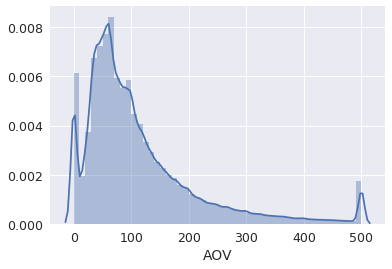

In [681]:
df_cust_txion_trnsfrm['AOV'] = np.clip(df_cust_txion_trnsfrm['AOV'], a_min=0, a_max=500)
sns.distplot(df_cust_txion_trnsfrm['AOV'])

In [682]:
df_cust_txion_trnsfrm['AOV'] = (df_cust_txion_trnsfrm['AOV']/50).round()

In [683]:
df_cust_txion_trnsfrm['AOV'].unique()

array([ 1.,  2.,  0.,  3.,  4.,  5.,  6., 10.,  8.,  7.,  9.])

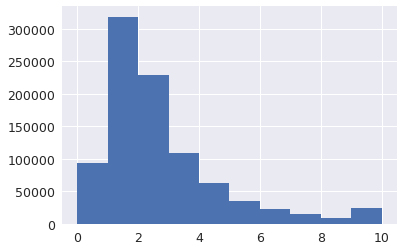

In [684]:
df_cust_txion_trnsfrm['AOV'].hist()

In [685]:
df_cust_txion_trnsfrm['Recency Days Bin'] = (df_cust_txion_trnsfrm['Recency Days']/100).round()
df_cust_txion_trnsfrm['Recency Days Bin'].value_counts()

0.0    175161
2.0    146977
1.0    144561
4.0    126664
3.0    110150
6.0     88256
5.0     81962
7.0     44465
Name: Recency Days Bin, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


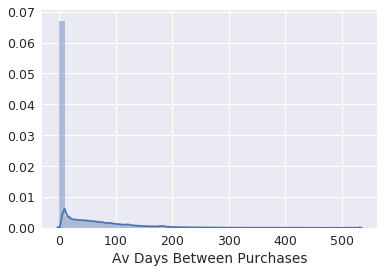

In [686]:
sns.distplot(df_cust_txion_trnsfrm['Av Days Between Purchases'])

In [687]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['Av Days Between Purchases'] > 200].count()

customer_id                  13078
language_code                13078
marital_status               13078
status                       13078
head_of_household_flag       13078
Gender                       13078
TenurewDXL                   13078
active_address_id            13078
create_source                13078
email_indicator              13078
opt_in_flag                  13078
email_available_ind          13078
Total Revenue                13078
No of Items Purchased        13078
No of Txions                 13078
Av Days Between Purchases    13078
Recency Days                 13078
Items Purchased Per Visit    13078
Av. Price Per Item           13078
AOV                          13078
TenurewDXLBin                13078
Recency Days Bin             13078
dtype: int64

In [688]:
df_cust_txion_trnsfrm['Av Days Between Purchases'] = np.clip(df_cust_txion_trnsfrm['Av Days Between Purchases'], a_min=0, a_max=200)

In [689]:
df_cust_txion_trnsfrm['Av Days Between Purchases Bin'] = (df_cust_txion_trnsfrm['Av Days Between Purchases']/20).round()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


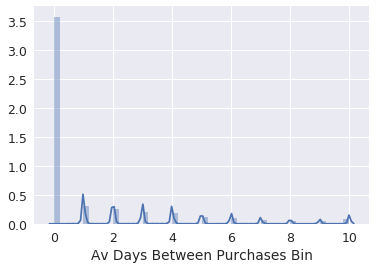

In [690]:
sns.distplot(df_cust_txion_trnsfrm['Av Days Between Purchases Bin'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


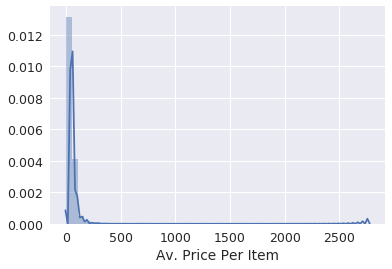

In [691]:
sns.distplot(df_cust_txion_trnsfrm['Av. Price Per Item'])

In [692]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['Av. Price Per Item'] > 200].count()

customer_id                      6364
language_code                    6364
marital_status                   6364
status                           6364
head_of_household_flag           6364
Gender                           6364
TenurewDXL                       6364
active_address_id                6364
create_source                    6364
email_indicator                  6364
opt_in_flag                      6364
email_available_ind              6364
Total Revenue                    6364
No of Items Purchased            6364
No of Txions                     6364
Av Days Between Purchases        6364
Recency Days                     6364
Items Purchased Per Visit        6364
Av. Price Per Item               6364
AOV                              6364
TenurewDXLBin                    6364
Recency Days Bin                 6364
Av Days Between Purchases Bin    6364
dtype: int64

In [693]:
df_cust_txion_trnsfrm['Av. Price Per Item']  = np.clip(df_cust_txion_trnsfrm['Av. Price Per Item'], a_min=0, a_max=200)

In [700]:
df_cust_txion_trnsfrm['Av. Price Per Item Bin'] = (df_cust_txion_trnsfrm['Av. Price Per Item'] / 20).round()

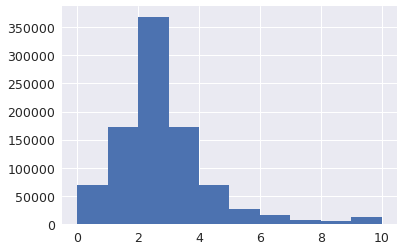

In [701]:
df_cust_txion_trnsfrm['Av. Price Per Item Bin'].hist()

#### Calculate CLTV - Customer Life Time Value = AOV * Average Yearly Transactions *  Average Gross Margin
#### Average gross margin for DXL = 45%

In [696]:
df_cust_txion_trnsfrm['CLTV'] = df_cust_txion_trnsfrm['Total Revenue']  * 0.45

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


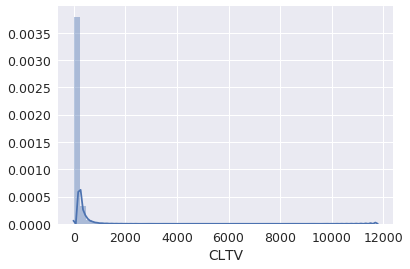

In [697]:
sns.distplot(df_cust_txion_trnsfrm['CLTV'])

In [698]:
df_cust_txion_trnsfrm.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,...,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin,CLTV
0,34291241,ENG,U,A,1.0,F,364,1,W,0.0,...,166.0,55.0,1.0,60.0,1.0,4.0,1.0,8.0,3.0,53.55
1,34291245,ENG,U,A,1.0,F,364,1,W,0.0,...,0.0,385.0,3.0,30.0,2.0,4.0,4.0,0.0,2.0,40.05
2,34291821,ENG,U,A,1.0,F,364,1,W,0.0,...,0.0,386.0,1.0,80.0,2.0,4.0,4.0,0.0,4.0,36.00
3,34291953,ENG,U,A,1.0,F,364,1,W,0.0,...,122.0,26.0,2.0,42.0,2.0,4.0,0.0,6.0,2.0,131.85
4,34292392,ENG,U,A,1.0,F,364,1,W,0.0,...,0.0,387.0,4.0,15.0,1.0,4.0,4.0,0.0,1.0,27.00


In [702]:
df_cust_txion_trnsfrm.nunique()

customer_id                      918196
language_code                         5
marital_status                        5
status                                3
head_of_household_flag                3
Gender                                3
TenurewDXL                          733
active_address_id                     4
create_source                        13
email_indicator                       3
opt_in_flag                           3
email_available_ind                   2
Total Revenue                      4443
No of Items Purchased               208
No of Txions                         79
Av Days Between Purchases           201
Recency Days                        729
Items Purchased Per Visit            11
Av. Price Per Item                  201
AOV                                  11
TenurewDXLBin                         8
Recency Days Bin                      8
Av Days Between Purchases Bin        11
Av. Price Per Item Bin               11
CLTV                               4443


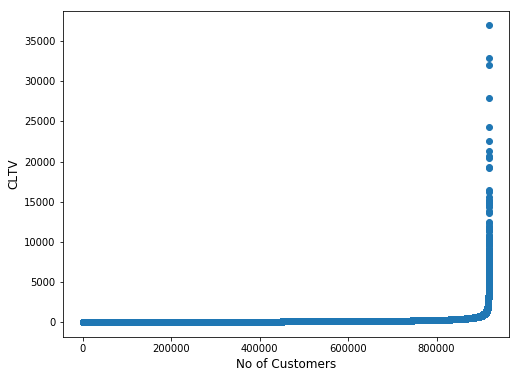

In [232]:
## Standard 80-20 role. 80% of revenue is coming from 20% of customers
cltv_df = df_cust_txion_trnsfrm.groupby("customer_id")['CLTV'].sum().reset_index()
plt.figure(figsize=(8,6))
#plt.scatter(range(cltv_df.shape[0]), np.sort(np.log1p(cltv_df["CLTV"].values)))
plt.scatter(range(df_cust_txion_trnsfrm.shape[0]), np.sort(df_cust_txion_trnsfrm["CLTV"]))
plt.xlabel('No of Customers', fontsize=12)
plt.ylabel('CLTV', fontsize=12)
plt.show()

In [245]:
df_cust_txion_trnsfrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918196 entries, 0 to 918195
Data columns (total 19 columns):
customer_id                      918196 non-null int64
language_code                    918196 non-null object
marital_status                   918196 non-null object
status                           918196 non-null object
head_of_household_flag           918196 non-null float64
Gender                           918196 non-null object
active_address_id                918196 non-null int64
create_source                    918196 non-null object
email_indicator                  918196 non-null object
opt_in_flag                      918196 non-null float64
email_available_ind              918196 non-null int64
Total Revenue                    918196 non-null float64
Recency Days                     918196 non-null float64
Items Purchased Per Visit        918196 non-null float64
Av. Price Per Item               918166 non-null float64
AOV                              918196 non-nu

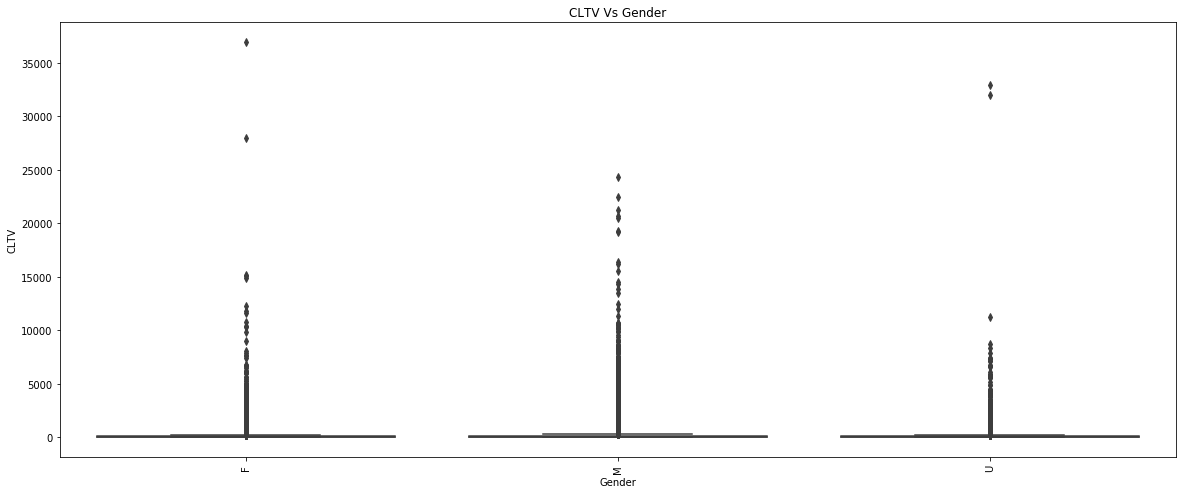

In [234]:
## Email needs fixing
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x="Gender", y="CLTV",data=df_cust_txion_trnsfrm,ax=ax)
ax.set(ylabel='CLTV',xlabel="Gender",title="CLTV Vs Gender")
plt.xticks(rotation=90) 
plt.show()

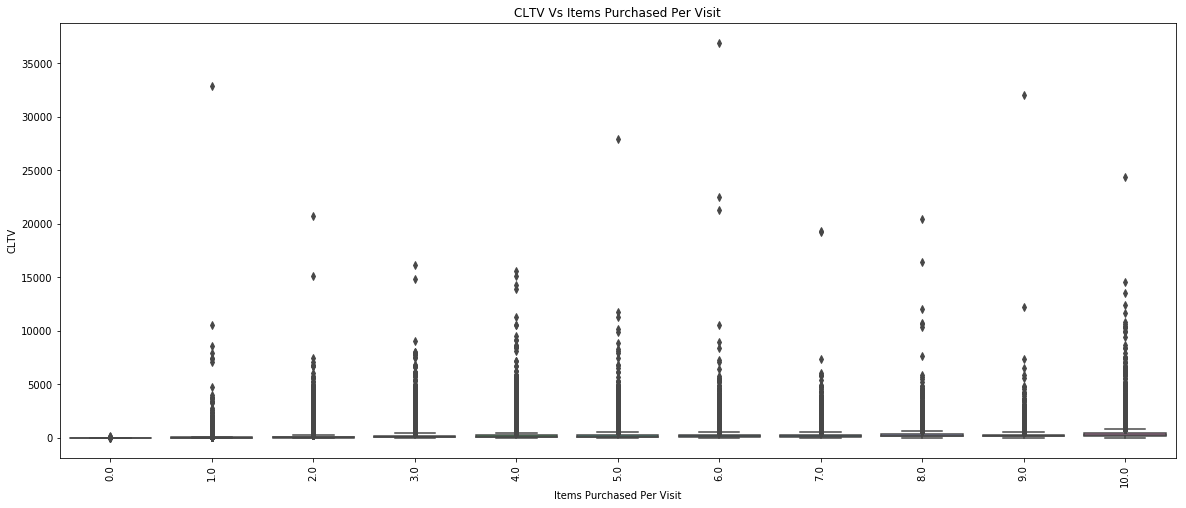

In [236]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x="Items Purchased Per Visit", y="CLTV",data=df_cust_txion_trnsfrm,ax=ax)
ax.set(ylabel='CLTV',xlabel="Items Purchased Per Visit",title="CLTV Vs Items Purchased Per Visit")
plt.xticks(rotation=90) 
plt.show()

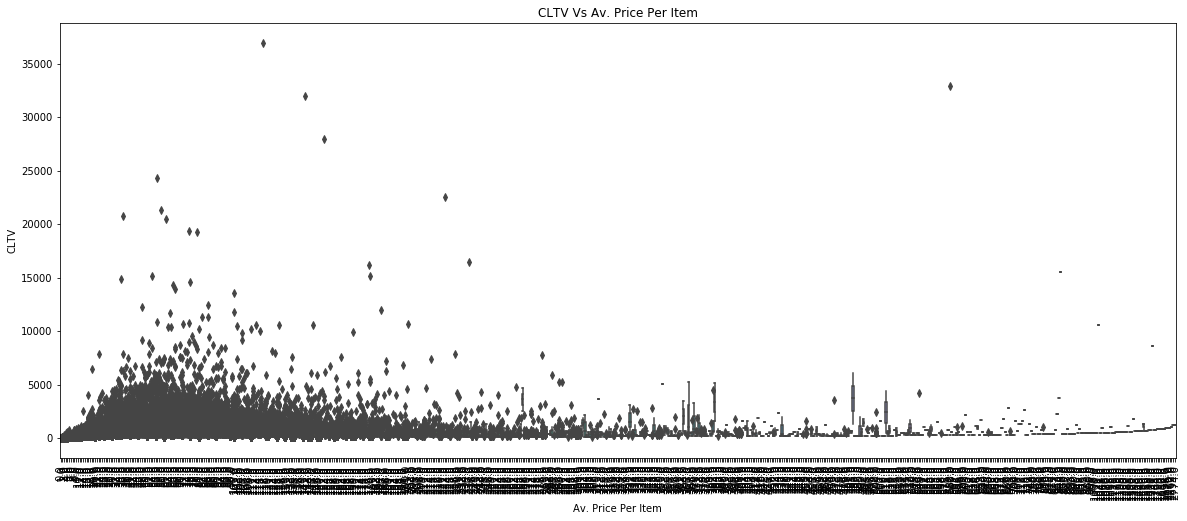

In [237]:
### Needs to split the sum no of transactions into bins
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x="Av. Price Per Item", y="CLTV",data=df_cust_txion_trnsfrm,ax=ax)
ax.set(ylabel='CLTV',xlabel="Av. Price Per Item",title="CLTV Vs Av. Price Per Item")
plt.xticks(rotation=90) 
plt.show()

In [703]:
df_cust_txion_final = df_cust_txion_trnsfrm.drop(['Av Days Between Purchases', 'No of Items Purchased', 'No of Txions', 'Recency Days', 'Av. Price Per Item', 'Total Revenue', 'TenurewDXL'], axis=1)

In [704]:
df_cust_txion_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918196 entries, 0 to 918195
Data columns (total 18 columns):
customer_id                      918196 non-null int64
language_code                    918196 non-null object
marital_status                   918196 non-null object
status                           918196 non-null object
head_of_household_flag           918196 non-null float64
Gender                           918196 non-null object
active_address_id                918196 non-null int64
create_source                    918196 non-null object
email_indicator                  918196 non-null object
opt_in_flag                      918196 non-null float64
email_available_ind              918196 non-null int64
Items Purchased Per Visit        918196 non-null float64
AOV                              918196 non-null float64
TenurewDXLBin                    918196 non-null float64
Recency Days Bin                 918196 non-null float64
Av Days Between Purchases Bin    918196 non-nu

In [705]:
df_cust_txion_final.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,AOV,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin,CLTV
0,34291241,ENG,U,A,1.0,F,1,W,0.0,0.0,1,1.0,1.0,4.0,1.0,8.0,3.0,53.55
1,34291245,ENG,U,A,1.0,F,1,W,0.0,0.0,1,3.0,2.0,4.0,4.0,0.0,2.0,40.05
2,34291821,ENG,U,A,1.0,F,1,W,0.0,0.0,1,1.0,2.0,4.0,4.0,0.0,4.0,36.00
3,34291953,ENG,U,A,1.0,F,1,W,0.0,0.0,1,2.0,2.0,4.0,0.0,6.0,2.0,131.85
4,34292392,ENG,U,A,1.0,F,1,W,0.0,0.0,1,4.0,1.0,4.0,4.0,0.0,1.0,27.00


In [706]:
df_encode = df_cust_txion_final.copy()

In [707]:
for col in df_encode.columns:
    if col in ['customer_id']: continue
    if df_encode[col].dtypes == object:
        df_encode[col], indexer = pd.factorize(df_encode[col])

In [708]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918196 entries, 0 to 918195
Data columns (total 18 columns):
customer_id                      918196 non-null int64
language_code                    918196 non-null int64
marital_status                   918196 non-null int64
status                           918196 non-null int64
head_of_household_flag           918196 non-null float64
Gender                           918196 non-null int64
active_address_id                918196 non-null int64
create_source                    918196 non-null int64
email_indicator                  918196 non-null int64
opt_in_flag                      918196 non-null float64
email_available_ind              918196 non-null int64
Items Purchased Per Visit        918196 non-null float64
AOV                              918196 non-null float64
TenurewDXLBin                    918196 non-null float64
Recency Days Bin                 918196 non-null float64
Av Days Between Purchases Bin    918196 non-null flo

In [709]:
df_encode.groupby('language_code')['customer_id'].count()

language_code
0    917365
1       162
2       626
3        34
4         9
Name: customer_id, dtype: int64

In [357]:
df_cust_txions.groupby('language_code')['customer_id'].count()

language_code
ENG    917365
FRE         9
GER        34
SPA       162
UNK       626
Name: customer_id, dtype: int64

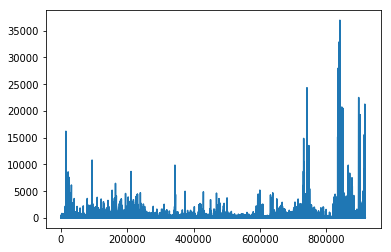

In [358]:
df_encode['CLTV'].plot()

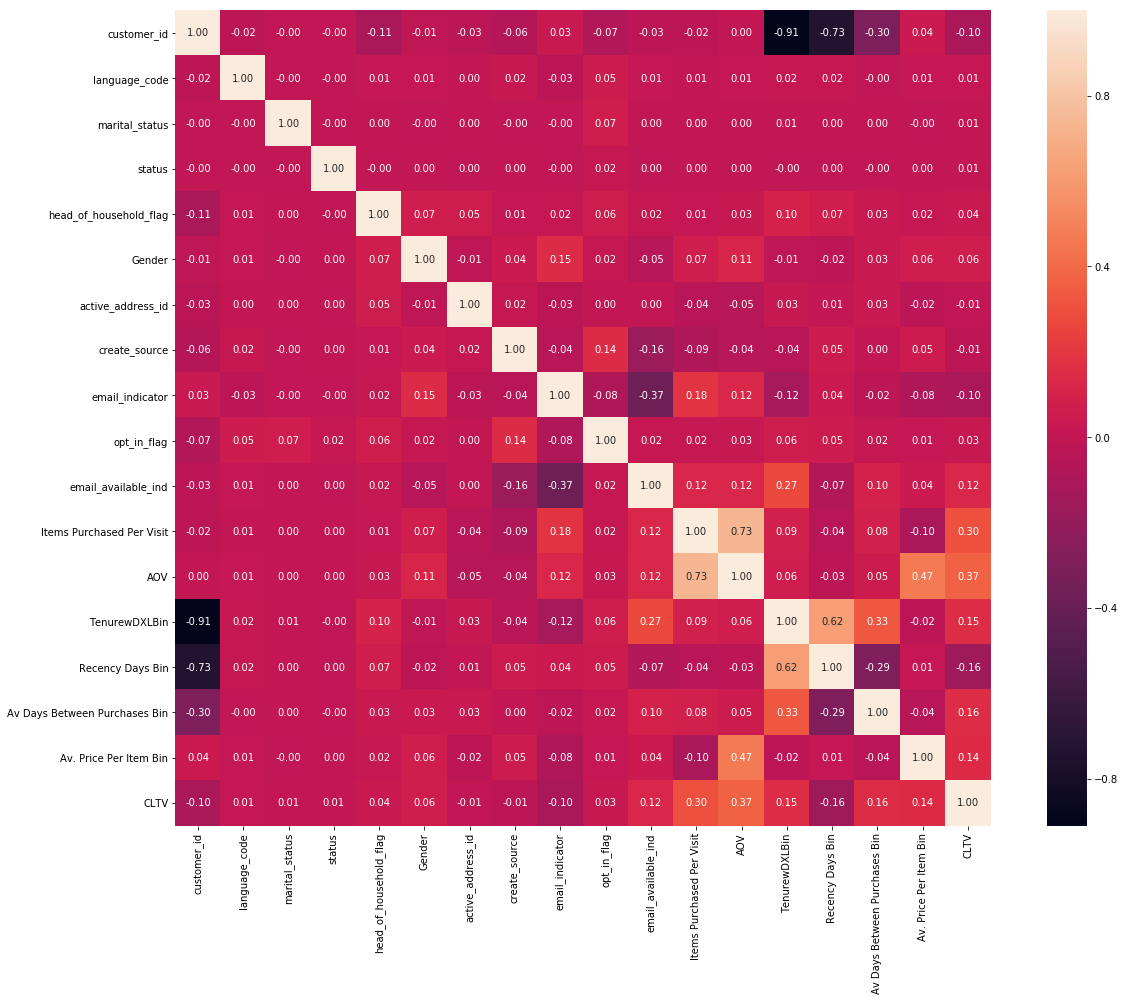

In [359]:
import seaborn as sns
corr_matrix = df_encode.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True)
plt.show()

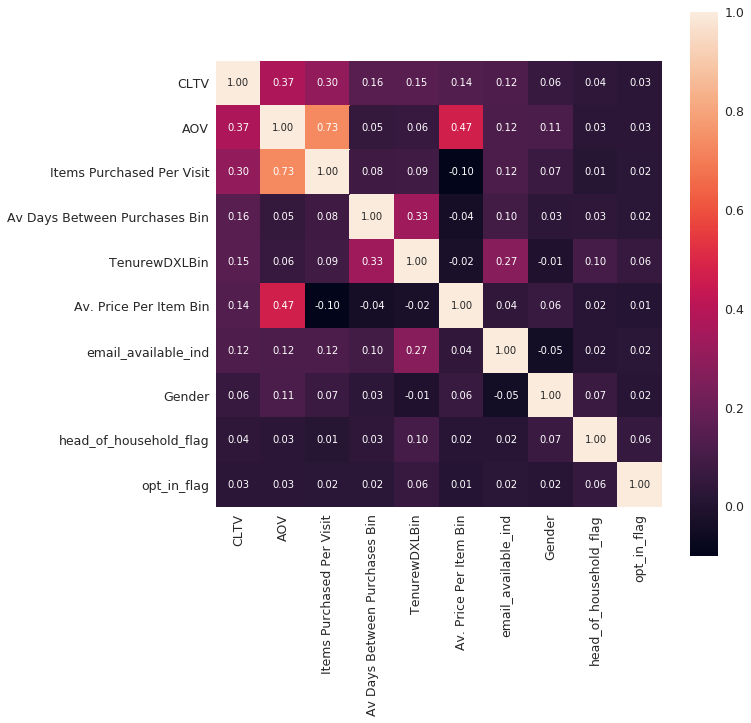

In [360]:
k =10
cols = corr_matrix.nlargest(k, 'CLTV')['CLTV'].index
cm = np.corrcoef(df_encode[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
%%time
cols = ['language_code', 'marital_status', 'status', 'Gender', 'loyalty_status', 'create_source', 'TenurewDXLBin', 'sum_no_transaction_lines', 'txion_interval_days', 'recency_days', 'AOV', 'count_transactions', 'CLTV']
sns.pairplot(df_encode[cols], size=2.5)
plt.show()

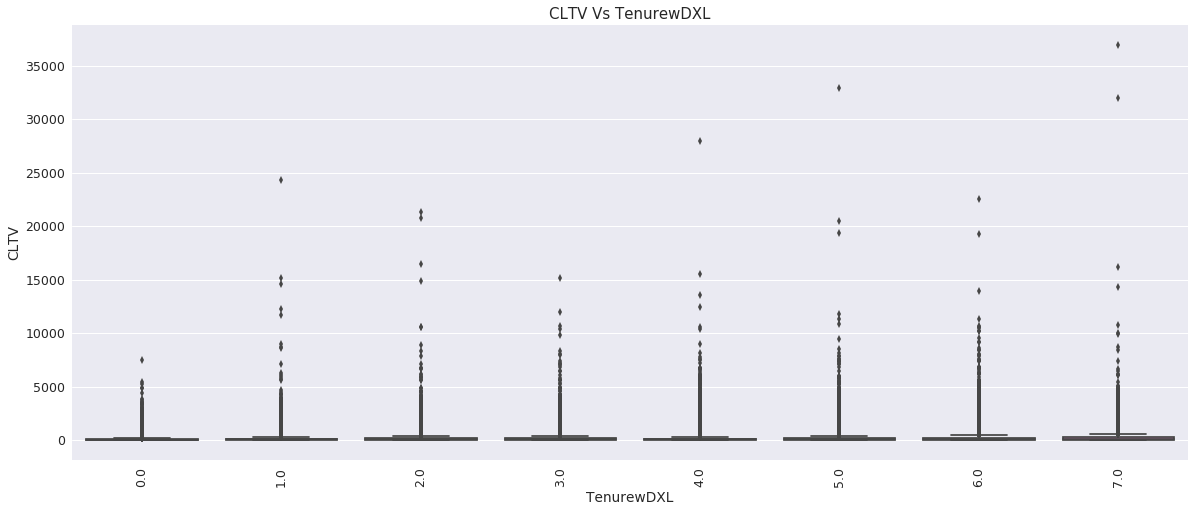

CPU times: user 626 ms, sys: 303 ms, total: 930 ms
Wall time: 497 ms


In [361]:
%%time
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x="TenurewDXLBin", y="CLTV",data=df_encode,ax=ax)
ax.set(ylabel='CLTV',xlabel="TenurewDXL",title="CLTV Vs TenurewDXL")
plt.xticks(rotation=90) 
plt.show()

In [710]:
X, y = df_encode.iloc[:,:-1], df_encode.iloc[:,-1]
print(X.shape, y.shape)

(918196, 17) (918196,)


In [711]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(734556, 17) (183640, 17) (734556,) (183640,)


In [712]:
X_train.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,AOV,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin
681681,34544025,0,0,0,1.0,1,1,1,1,0.0,1,3.0,2.0,3.0,1.0,2.0,1.0
866598,34152319,0,0,0,1.0,1,1,4,0,0.0,1,5.0,5.0,4.0,0.0,1.0,2.0
362605,35037807,0,0,0,1.0,0,1,1,1,0.0,1,1.0,1.0,1.0,2.0,0.0,3.0
187085,33793685,0,0,0,0.0,0,1,4,0,0.0,1,2.0,2.0,5.0,4.0,3.0,3.0
337057,34772237,0,0,0,0.0,1,1,1,1,0.0,1,4.0,3.0,2.0,2.0,0.0,2.0


In [714]:
%%time
xgb_matrix = xgb.DMatrix(data=X_train, label=y_train)
params={"objective":"reg:linear", "max_depth":10}
cv_results = xgb.cv(dtrain=xgb_matrix, params=params, nfold=10, metrics="rmse", num_boost_round=50, as_pandas=True, seed=123)
print(cv_results)

[01:51:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1612 extra nodes, 0 pruned nodes, max_depth=10
[01:51:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1606 extra nodes, 0 pruned nodes, max_depth=10
[01:51:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1588 extra nodes, 0 pruned nodes, max_depth=10
[01:51:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1564 extra nodes, 0 pruned nodes, max_depth=10
[01:51:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1636 extra nodes, 0 pruned nodes, max_depth=10
[01:51:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1626 extra nodes, 0 pruned nodes, max_depth=10
[01:51:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1628 extra nodes, 0 pruned nodes, max_depth=10
[01:51:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1574 extra nodes, 0 pruned nodes, max_d

[01:52:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1756 extra nodes, 0 pruned nodes, max_depth=10
[01:52:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1848 extra nodes, 0 pruned nodes, max_depth=10
[01:52:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1820 extra nodes, 0 pruned nodes, max_depth=10
[01:52:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1822 extra nodes, 0 pruned nodes, max_depth=10
[01:53:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1754 extra nodes, 0 pruned nodes, max_depth=10
[01:53:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1684 extra nodes, 0 pruned nodes, max_depth=10
[01:53:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1808 extra nodes, 0 pruned nodes, max_depth=10
[01:53:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1850 extra nodes, 0 pruned nodes, max_d

[01:54:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1602 extra nodes, 0 pruned nodes, max_depth=10
[01:54:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1296 extra nodes, 0 pruned nodes, max_depth=10
[01:54:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1230 extra nodes, 0 pruned nodes, max_depth=10
[01:54:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1340 extra nodes, 0 pruned nodes, max_depth=10
[01:54:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1272 extra nodes, 0 pruned nodes, max_depth=10
[01:54:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1394 extra nodes, 0 pruned nodes, max_depth=10
[01:54:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1414 extra nodes, 0 pruned nodes, max_depth=10
[01:54:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1518 extra nodes, 0 pruned nodes, max_d

[01:55:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=10
[01:56:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1284 extra nodes, 0 pruned nodes, max_depth=10
[01:56:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1400 extra nodes, 0 pruned nodes, max_depth=10
[01:56:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 720 extra nodes, 0 pruned nodes, max_depth=10
[01:56:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1192 extra nodes, 0 pruned nodes, max_depth=10
[01:56:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1454 extra nodes, 0 pruned nodes, max_depth=10
[01:56:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1480 extra nodes, 0 pruned nodes, max_depth=10
[01:56:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1400 extra nodes, 0 pruned nodes, max_dep

[01:57:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1122 extra nodes, 0 pruned nodes, max_depth=10
[01:57:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 868 extra nodes, 0 pruned nodes, max_depth=10
[01:57:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 0 pruned nodes, max_depth=10
[01:57:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=10
[01:57:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1344 extra nodes, 0 pruned nodes, max_depth=10
[01:57:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 900 extra nodes, 0 pruned nodes, max_depth=10
[01:57:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1250 extra nodes, 0 pruned nodes, max_depth=10
[01:57:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1298 extra nodes, 0 pruned nodes, max_depth

[01:58:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=10
[01:58:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1086 extra nodes, 0 pruned nodes, max_depth=10
[01:58:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 0 pruned nodes, max_depth=10
[01:58:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1298 extra nodes, 0 pruned nodes, max_depth=10
[01:58:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=10
[01:58:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1124 extra nodes, 0 pruned nodes, max_depth=10
[01:58:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 0 pruned nodes, max_depth=10
[01:58:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1214 extra nodes, 0 pruned nodes, max_depth

[02:00:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1094 extra nodes, 0 pruned nodes, max_depth=10
[02:00:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 0 pruned nodes, max_depth=10
[02:00:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 0 pruned nodes, max_depth=10
[02:00:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 726 extra nodes, 0 pruned nodes, max_depth=10
[02:00:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 986 extra nodes, 0 pruned nodes, max_depth=10
[02:00:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 834 extra nodes, 0 pruned nodes, max_depth=10
[02:00:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_depth=10
[02:00:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 0 pruned nodes, max_depth=10

[02:01:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 0 pruned nodes, max_depth=10
[02:01:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 984 extra nodes, 0 pruned nodes, max_depth=10
[02:01:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 792 extra nodes, 0 pruned nodes, max_depth=10
[02:01:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 0 pruned nodes, max_depth=10
[02:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 984 extra nodes, 0 pruned nodes, max_depth=10
[02:01:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1052 extra nodes, 0 pruned nodes, max_depth=10
[02:01:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=10
[02:01:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 0 pruned nodes, max_depth=10

In [715]:
print((cv_results["test-rmse-mean"]).iloc[-1])

76.6907654


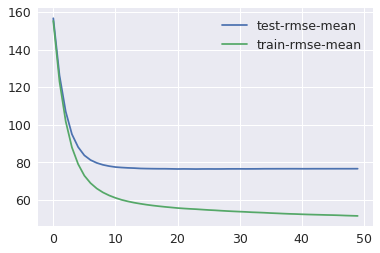

In [716]:
cv_results.loc[0:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [717]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

params={"objective":"reg:linear","max_depth":10}

xgb_pipeline = Pipeline([
                        ("st_scaler",StandardScaler()), 
                        ("xgb_model",xgb.XGBRegressor(params=params, seed=123))
                       ])

print('xgb_pipeline: ', xgb_pipeline)
xgb_param_grid = {
     'xgb_model__subsample':np.arange(0.05, 1, 0.05),
     'xgb_model__gamma': [0, 0.5, 1],
     'xgb_model__learning_rate': np.arange(0.05, 1.05, 0.05),
     'xgb_model__max_depth': np.arange(3, 20, 1),
     'xgb_model__colsample_bytree': np.arange(.1, 1.05,.05) 
 }
    
# # Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=xgb_param_grid, n_iter=5, scoring="neg_mean_squared_error", cv=3, verbose=1)
print('randomized_roc_auc: ', randomized_roc_auc)

xgb_pipeline:  Pipeline(memory=None,
     steps=[('st_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimator...,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1))])
randomized_roc_auc:  RandomizedSearchCV(cv=3, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('st_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimator...,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1))]),
          fit_params=None, iid=Tr

In [718]:
%%time
# # Fit the estimator
randomized_roc_auc.fit(X_train, y_train)

# # Compute metrics
print('Lowest RMSE found: ',randomized_roc_auc.best_score_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_roc_auc.best_score_)))
print('Best Estimator:\n',randomized_roc_auc.best_estimator_)
print('Best parameters found\n: ', randomized_roc_auc.best_params_)
clf_best = randomized_roc_auc.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 12.9min finished


Lowest RMSE found:  -6086.120246981008
Lowest RMSE found:  78.01359014287836
Best Estimator:
 Pipeline(memory=None,
     steps=[('st_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb_model', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8000000000000002, gamma=0, learning_rate=0.25,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=0.45))])
Best parameters found
:  {'xgb_model__subsample': 0.45, 'xgb_model__max_depth': 6, 'xgb_model__learning_rate': 0.25, 'xgb_model__gamma': 0, 'xgb_model__colsample_bytree': 0.8000000000000002}
CPU times: user 14min 6s, sys: 5.92 s, total: 14min 12s
Wall time: 14min 12s


In [719]:
train_params = {
    "xgb_model__objective":"reg:linear",    
    'xgb_model__subsample': 0.45, 
    'xgb_model__max_depth': 6, 
    'xgb_model__learning_rate': 0.25, 
    'xgb_model__gamma': 0, 
    'xgb_model__colsample_bytree': 0.800000000000002,
    "xgb_model__n_estimators":200
}
xg_reg = xgb.train(dtrain=xgb_matrix, params=train_params, num_boost_round=25)

[02:35:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[02:35:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[02:35:0

In [ ]:
import matplotlib.pyplot as plt

#xgb.plot_tree(xg_reg, num_trees=2)
xgb.plot_tree(xg_reg, num_trees=0)

## Plot only the 1st tree and node-id
#xgb.plot.tree(model = bst, trees = 0, show_node_id = TRUE)

fig = plt.gcf()
fig.set_size_inches(300, 175)
fig.savefig('xgboost_ecom.jpg')

ValueError: Unable to parse node: 1:[Av

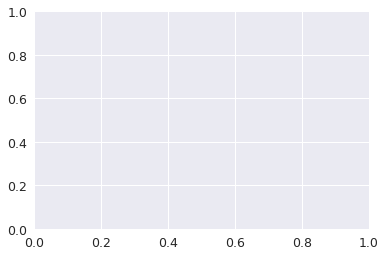

In [720]:
#xgb.plot_tree(xg_reg, num_trees=2)
xgb.plot_tree(xg_reg, num_trees=0, rankdir="LR")
fig = plt.gcf()
fig.set_size_inches(300, 175)
fig.savefig('xgboost_ecom.jpg')

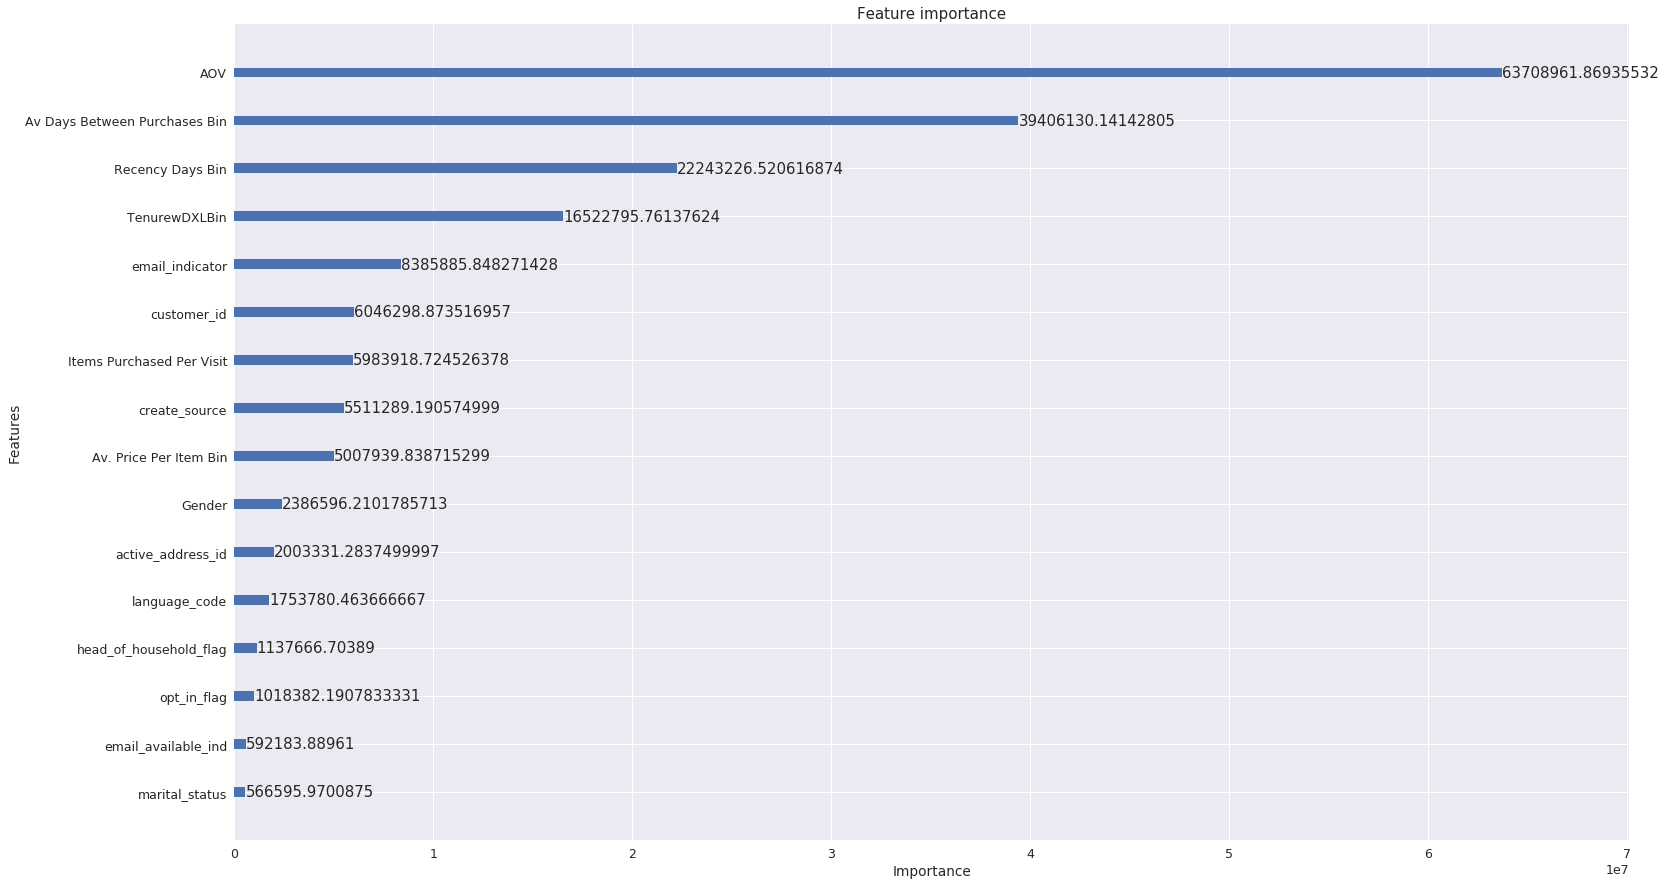

In [721]:
xgb.plot_importance(xg_reg, importance_type="gain", xlabel="Importance")
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.show()

In [722]:
from sklearn.metrics import mean_squared_error
train_preds = xg_reg.predict(xgb_matrix)
rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print("Training RMSE: %f" % (rmse))

Training RMSE: 72.756891


In [723]:
#xgb_matrix = xgb.DMatrix(data=X_train, label=y_train)
xgb_matrix_test = xgb.DMatrix(data=X_test, label=y_test)
test_preds = xg_reg.predict(xgb_matrix_test)
print(y_test.shape, test_preds.shape)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("Test RMSE: %f" % (rmse))

(183640,) (183640,)
Test RMSE: 77.814543


In [762]:
final_df=X_test.copy()
final_df['Actual YV'] = y_test.tolist()
final_df['Predicted YV'] = test_preds.tolist()
final_df.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,AOV,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin,Actual YV,Predicted YV
167041,34816621,0,0,0,1.0,1,1,0,0,0.0,1,2.0,2.0,2.0,0.0,4.0,2.0,104.85,128.807022
731497,35607362,0,0,0,1.0,2,1,2,1,0.0,0,2.0,1.0,0.0,0.0,0.0,2.0,33.30,39.633720
437286,34176583,0,0,0,1.0,1,1,1,1,0.0,0,3.0,2.0,3.0,4.0,0.0,1.0,39.60,45.111885
704645,33836500,0,0,0,1.0,1,1,1,1,0.0,1,4.0,6.0,5.0,0.0,6.0,3.0,534.15,511.422821
456988,33868953,0,0,0,1.0,1,1,1,1,0.0,0,1.0,0.0,4.0,5.0,0.0,0.0,0.00,-0.567801


In [346]:
final_df[final_df['PredictedCLTV'] > 1000].head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,recency_days,txion_interval_days,TenurewDXLBin,NoOfPurchasesPerVisit,AOV,ActualCLTV,PredictedCLTV
167139,33331451,0,0,0,1.0,1,1,2,0,0.0,1,0.0,7.0,7.0,4.0,5.0,474.0660,1241.976318
849316,34462008,0,0,0,1.0,1,1,1,0,0.0,1,0.0,3.0,3.0,5.0,10.0,685.4535,1692.048340
904585,33971562,0,0,0,1.0,2,1,5,0,0.0,1,2.0,1.0,4.0,5.0,10.0,645.6195,1035.185425
920175,34507582,2,0,0,0.0,2,1,4,1,0.0,0,0.0,3.0,3.0,2.0,2.0,360.6750,1045.442383
756981,34105744,0,0,0,1.0,1,1,1,1,0.0,1,0.0,4.0,4.0,12.0,10.0,493.4070,1187.681030


In [767]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183640 entries, 167041 to 365662
Data columns (total 19 columns):
customer_id                      183640 non-null int64
language_code                    183640 non-null int64
marital_status                   183640 non-null int64
status                           183640 non-null int64
head_of_household_flag           183640 non-null float64
Gender                           183640 non-null int64
active_address_id                183640 non-null int64
create_source                    183640 non-null int64
email_indicator                  183640 non-null int64
opt_in_flag                      183640 non-null float64
email_available_ind              183640 non-null int64
Items Purchased Per Visit        183640 non-null float64
AOV                              183640 non-null float64
TenurewDXLBin                    183640 non-null float64
Recency Days Bin                 183640 non-null float64
Av Days Between Purchases Bin    183640 non-nul

In [764]:
df_cust_filter = df_cust.filter(['customer_id', 'loyalty_status'])
df_cust_filter.head()

,customer_id,loyalty_status
0,34291241,BRNZE
1,34291245,BRNZE
2,34291821,BRNZE
3,34291953,BRNZE
4,34292392,BRNZE


In [765]:
final_df_merge1 = pd.merge(final_df, df_cust_filter, on='customer_id', how='left' )
final_df_merge1.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,AOV,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin,Actual YV,Predicted YV,loyalty_status
0,34816621,0,0,0,1.0,1,1,0,0,0.0,1,2.0,2.0,2.0,0.0,4.0,2.0,104.85,128.807022,BRNZE
1,35607362,0,0,0,1.0,2,1,2,1,0.0,0,2.0,1.0,0.0,0.0,0.0,2.0,33.30,39.633720,REGULAR
2,34176583,0,0,0,1.0,1,1,1,1,0.0,0,3.0,2.0,3.0,4.0,0.0,1.0,39.60,45.111885,BRNZE
3,33836500,0,0,0,1.0,1,1,1,1,0.0,1,4.0,6.0,5.0,0.0,6.0,3.0,534.15,511.422821,SVLRE
4,33868953,0,0,0,1.0,1,1,1,1,0.0,0,1.0,0.0,4.0,5.0,0.0,0.0,0.00,-0.567801,BRNZE


In [766]:
final_df_merge1['customer_id'].nunique()

183640

In [380]:
df_cust_txions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918196 entries, 0 to 918195
Data columns (total 20 columns):
customer_id                  918196 non-null int64
language_code                918196 non-null object
marital_status               918196 non-null object
status                       918196 non-null object
head_of_household_flag       918196 non-null float64
Gender                       918196 non-null object
TenurewDXL                   918196 non-null int64
active_address_id            918196 non-null int64
create_source                918196 non-null object
email_indicator              918196 non-null object
opt_in_flag                  918196 non-null float64
email_available_ind          918196 non-null int64
Total Revenue                918196 non-null float64
No of Items Purchased        918196 non-null int64
No of Txions                 918196 non-null int64
Av Days Between Purchases    918196 non-null float64
Recency Days                 918196 non-null float64
Items 

In [419]:
df_cust_txions['create_source'].unique()

array(['W', 'POS', 'ISE', 'nan', 'STR13', 'ATG', 'WEB', 'RSPS', 'ECOM',
       'CAT', '99999', 'FIFTYONE', 'RBT_08'], dtype=object)

In [769]:
df_cust_txions_filter = df_cust_txions.filter(['customer_id','AOV','Total Revenue', 'No of Txions','create_source', 'Av Days Between Purchases'])
df_cust_txions_filter.head()

,customer_id,AOV,Total Revenue,No of Txions,create_source,Av Days Between Purchases
0,34291241,59.500000,119.0,2,W,166.0
1,34291245,89.000000,89.0,1,W,0.0
2,34291821,80.000000,80.0,1,W,0.0
3,34291953,97.666667,293.0,3,W,122.0
4,34292392,60.000000,60.0,1,W,0.0


In [770]:
final_df_merge2 = pd.merge(final_df_merge1, df_cust_txions_filter, on='customer_id', how='left')
final_df_merge2.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source_x,email_indicator,opt_in_flag,...,Av Days Between Purchases Bin,Av. Price Per Item Bin,Actual YV,Predicted YV,loyalty_status,AOV_y,Total Revenue,No of Txions,create_source_y,Av Days Between Purchases
0,34816621,0,0,0,1.0,1,1,0,0,0.0,...,4.0,2.0,104.85,128.807022,BRNZE,77.666667,233.0,3,W,73.0
1,35607362,0,0,0,1.0,2,1,2,1,0.0,...,0.0,2.0,33.30,39.633720,REGULAR,74.000000,74.0,1,ISE,0.0
2,34176583,0,0,0,1.0,1,1,1,1,0.0,...,0.0,1.0,39.60,45.111885,BRNZE,88.000000,88.0,1,POS,0.0
3,33836500,0,0,0,1.0,1,1,1,1,0.0,...,6.0,3.0,534.15,511.422821,SVLRE,296.750000,1187.0,4,POS,119.0
4,33868953,0,0,0,1.0,1,1,1,1,0.0,...,0.0,0.0,0.00,-0.567801,BRNZE,0.000000,0.0,1,POS,0.0


In [771]:
final_df_merge2.drop(['TenurewDXLBin', 'AOV_x', 'Recency Days Bin', 'Av Days Between Purchases Bin', 'Av. Price Per Item Bin', 'create_source_x'], axis=1, inplace=True)

In [768]:
final_df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183640 entries, 0 to 183639
Data columns (total 20 columns):
customer_id                  183640 non-null int64
language_code                183640 non-null int64
marital_status               183640 non-null int64
status                       183640 non-null int64
head_of_household_flag       183640 non-null float64
Gender                       183640 non-null int64
active_address_id            183640 non-null int64
email_indicator              183640 non-null int64
opt_in_flag                  183640 non-null float64
email_available_ind          183640 non-null int64
Items Purchased Per Visit    183640 non-null float64
ActualCLTV                   183640 non-null float64
PredictedCLTV                183640 non-null float64
loyalty_status               183640 non-null object
AOV_y                        183640 non-null float64
Total Revenue                183640 non-null float64
No of Txions                 183640 non-null int64
create_

In [400]:
df_cust_txions[df_cust_txions['customer_id'] == 33707465]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV
867084,33707465,ENG,U,A,0.0,F,511,1,STR13,0.0,0.0,1,9472.0,164,24,19.0,103.0,7.0,58.0,394.666667


In [401]:
final_df_merge2.loc[(final_df_merge2['PredictedCLTV'] > 2000) & (final_df_merge2['Gender'] ==0)].head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,ActualCLTV,PredictedCLTV,loyalty_status,AOV_y,Total Revenue,No of Txions
2348,33212253,0,0,0,1.0,0,1,5,0,0.0,1,6.0,288.90,3266.310791,GOLD,642.000000,642.0,1
27517,33431033,0,0,0,1.0,0,1,0,0,0.0,1,3.0,1851.75,2326.847900,PLATN,128.593750,4115.0,32
47152,34338917,0,0,0,1.0,0,1,1,0,0.0,1,6.0,2831.40,2943.382812,PLATN,449.428571,6292.0,14
55034,33424349,0,0,0,1.0,0,1,1,0,0.0,1,8.0,2184.30,2183.675537,PLATN,285.529412,4854.0,17
66399,35021804,0,0,0,0.0,0,1,0,0,0.0,1,2.0,3341.70,2951.426025,PLATN,297.040000,7426.0,25


In [425]:
## Language code-1 is hispanic
final_df_merge2.loc[(final_df_merge2['PredictedCLTV'] > 500) & (final_df_merge2['language_code'] ==1)].head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,ActualCLTV,PredictedCLTV,loyalty_status,AOV_y,Total Revenue,No of Txions,create_source_y
5219,34595553,1,0,0,1.0,1,1,0,1.0,1,3.0,374.40,541.810425,REGULAR,208.0,832.0,4,FIFTYONE
107701,34326290,1,0,0,1.0,1,1,0,1.0,1,10.0,529.65,579.387146,REGULAR,1177.0,1177.0,1,FIFTYONE


In [609]:
final_df_merge2.groupby('loyalty_status')['AOV_y'].mean()/2

loyalty_status
BRNZE       48.604593
GOLD       117.918909
PLATN      160.810902
REGULAR     33.059602
SVLRE       95.568258
Name: AOV_y, dtype: float64

In [610]:
final_df_merge2['AOV_y'].mean()

116.02022430835017

In [611]:
final_df_merge2['Total Revenue'].mean()

293.3069320409497

In [612]:
final_df_merge2.groupby('loyalty_status')['ActualCLTV'].mean()/2

loyalty_status
BRNZE       38.428696
GOLD       232.712886
PLATN      541.556268
REGULAR     22.271614
SVLRE      122.399641
Name: ActualCLTV, dtype: float64

In [405]:
final_df_merge2.groupby('loyalty_status')['PredictedCLTV'].mean()/2

loyalty_status
BRNZE       43.069625
GOLD       212.653264
PLATN      434.280844
REGULAR     22.522998
SVLRE      121.067223
Name: PredictedCLTV, dtype: float64

In [761]:
final_df_merge2.groupby(['loyalty_status','create_source_y'])['customer_id'].count().to_frame()

customer_id
loyalty_status create_source_y             
BRNZE          99999                      1
               ATG                     6936
               CAT                        4
               ECOM                      27
               FIFTYONE                  21
               ISE                     2670
               POS                    84090
               RSPS                       7
               STR13                  10479
               W                      31730
               WEB                       75
               nan                      149
GOLD           ATG                      411
               CAT                        1
               ECOM                       2
               FIFTYONE                   2
               ISE                      116
               POS                     5501
               STR13                    374
               W                       1060
               WEB                       11
               nan                        7
PLATN          ATG                      208
               ECOM                       1
               ISE                       89
               POS                     3065
               RSPS                       2
               STR13                    239
               W                        589
               WEB                        7
               nan                        4
REGULAR        ATG                       44
               CAT                      122
               ECOM                     564
               FIFTYONE                 359
               ISE                      129
               POS                      613
               RSPS                      17
               STR13                    135
               W                       7482
               WEB                     5610
               nan                        8
SVLRE          ATG                     1127
               ECOM                       3
               FIFTYONE                   2
               ISE                      176
               POS                    15033
               RSPS                       3
               STR13                   1154
               W                       3150
               WEB                       20
               nan                       11

In [479]:
final_df_merge2.groupby(['loyalty_status'])['Av Days Between Purchases'].mean().round().to_frame()

,Av Days Between Purchases
loyalty_status,
BRNZE,17.0
GOLD,45.0
PLATN,38.0
REGULAR,8.0
SVLRE,43.0


In [490]:
final_df_merge2['Av Days Between Purchases'].mean()

20.636517098671312

In [487]:
final_df_merge2.groupby(['loyalty_status'])['Items Purchased Per Visit'].mean().round().to_frame()

,Items Purchased Per Visit
loyalty_status,
BRNZE,2.0
GOLD,4.0
PLATN,5.0
REGULAR,1.0
SVLRE,4.0


In [488]:
final_df_merge2.groupby(['loyalty_status'])['No of Txions'].mean().round().to_frame()

,No of Txions
loyalty_status,
BRNZE,2.0
GOLD,7.0
PLATN,13.0
REGULAR,2.0
SVLRE,4.0


In [493]:
final_df_merge2.groupby('loyalty_status')['AOV_y'].mean().to_frame().round()

,AOV_y
loyalty_status,
BRNZE,97.0
GOLD,236.0
PLATN,322.0
REGULAR,66.0
SVLRE,191.0


In [482]:
final_df_merge2.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,ActualCLTV,PredictedCLTV,loyalty_status,AOV_y,Total Revenue,No of Txions,create_source_y,Av Days Between Purchases
0,34816621,0,0,0,1.0,1,1,0,0.0,1,2.0,104.85,107.606415,BRNZE,77.666667,233.0,3,W,73.0
1,35607362,0,0,0,1.0,2,1,1,0.0,0,2.0,33.30,42.606533,REGULAR,74.000000,74.0,1,ISE,0.0
2,34176583,0,0,0,1.0,1,1,1,0.0,0,3.0,39.60,51.869892,BRNZE,88.000000,88.0,1,POS,0.0
3,33836500,0,0,0,1.0,1,1,1,0.0,1,4.0,534.15,514.139832,SVLRE,296.750000,1187.0,4,POS,119.0
4,33868953,0,0,0,1.0,1,1,1,0.0,0,1.0,0.00,-3.051675,BRNZE,0.000000,0.0,1,POS,0.0


In [406]:
df_cust_txions.head()

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV
0,34291241,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,119.0,2,2,166.0,55.0,1.0,60.0,59.5
1,34291245,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,89.0,3,1,0.0,385.0,3.0,30.0,89.0
2,34291821,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,80.0,1,1,0.0,386.0,1.0,80.0,80.0
3,34291953,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,481.0,11,5,73.0,26.0,2.0,44.0,96.2
4,34292392,ENG,U,A,1.0,F,364,1,W,0.0,0.0,1,60.0,4,1,0.0,387.0,4.0,15.0,60.0


In [865]:
final_df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183640 entries, 0 to 183639
Data columns (total 20 columns):
customer_id                  183640 non-null int64
language_code                183640 non-null int64
marital_status               183640 non-null int64
status                       183640 non-null int64
head_of_household_flag       183640 non-null float64
Gender                       183640 non-null int64
active_address_id            183640 non-null int64
email_indicator              183640 non-null int64
opt_in_flag                  183640 non-null float64
email_available_ind          183640 non-null int64
Items Purchased Per Visit    183640 non-null float64
Actual YV                    183640 non-null float64
Predicted YV                 183640 non-null float64
loyalty_status               183640 non-null object
AOV_y                        183640 non-null float64
Total Revenue                183640 non-null float64
No of Txions                 183640 non-null int64
create_

In [868]:
### 184177 records in the test set. 
loyalty_metrics = final_df_merge2.groupby('loyalty_status').agg(
    {
        'Predicted YV':'mean',
        'Actual YV':'mean',
        'customer_id':'count',
        'Total Revenue':'mean',
        'No of Txions':'mean'
    }    
).round()
loyalty_metrics['AOV'] = (loyalty_metrics['Total Revenue']/loyalty_metrics['No of Txions']).round()
loyalty_metrics['Customer%'] = loyalty_metrics['customer_id'].apply(lambda x:(100 - (((183640 -x)/183640 ))*100))
loyalty_metrics['Customer%'] = loyalty_metrics['Customer%'].round()
loyalty_metrics['Prediction Accuracy'] =  100 - abs(((loyalty_metrics['Predicted YV']- loyalty_metrics['Actual YV'])/(loyalty_metrics['Predicted YV'])*100).round())
loyalty_metrics = loyalty_metrics.rename(columns={'customer_id':'No of Customers', 'Total Revenue':'Av. Tot. Revenue', 'No of Txions':'Av. No of Txions'})
loyalty_metrics = loyalty_metrics[['No of Customers', 'Customer%', 'Av. Tot. Revenue', 'Av. No of Txions', 'AOV', 'Predicted YV', 'Actual YV', 'Prediction Accuracy']].reset_index()
loyalty_metrics

,loyalty_status,No of Customers,Customer%,Av. Tot. Revenue,Av. No of Txions,AOV,Predicted YV,Actual YV,Prediction Accuracy
0,BRNZE,136189,74.0,144.0,2.0,72.0,70.0,65.0,93.0
1,GOLD,7485,4.0,826.0,5.0,165.0,350.0,371.0,94.0
2,PLATN,4204,2.0,1789.0,9.0,199.0,669.0,805.0,80.0
3,REGULAR,15083,8.0,88.0,1.0,88.0,40.0,40.0,100.0
4,SVLRE,20679,11.0,447.0,3.0,149.0,201.0,201.0,100.0


In [869]:
loyalty_metrics.set_index('loyalty_status', inplace=True)
list_ordering = ["REGULAR","BRNZE", "SVLRE","GOLD","PLATN"] 
loyalty_metrics = loyalty_metrics.reindex(list_ordering)
loyalty_metrics

,No of Customers,Customer%,Av. Tot. Revenue,Av. No of Txions,AOV,Predicted YV,Actual YV,Prediction Accuracy
loyalty_status,,,,,,,,
REGULAR,15083,8.0,88.0,1.0,88.0,40.0,40.0,100.0
BRNZE,136189,74.0,144.0,2.0,72.0,70.0,65.0,93.0
SVLRE,20679,11.0,447.0,3.0,149.0,201.0,201.0,100.0
GOLD,7485,4.0,826.0,5.0,165.0,350.0,371.0,94.0
PLATN,4204,2.0,1789.0,9.0,199.0,669.0,805.0,80.0


In [608]:
final_df_merge2.loc[((final_df_merge2['loyalty_status'] == 'GOLD') & (final_df_merge2['AOV_y'] > 100) & (final_df_merge2['Gender'] ==1))]
#final_df_merge2[final_df_merge2['customer_id'] == 33576738]
#33576738

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,ActualCLTV,PredictedCLTV,loyalty_status,AOV_y,Total Revenue,No of Txions,create_source_y,Av Days Between Purchases,PredAccuracy
13,34652544,0,0,0,1.0,1,1,1,0.0,1,3.0,347.40,495.370972,GOLD,128.666667,772.0,6,POS,45.0,70.0
97,34704888,0,0,0,1.0,1,1,1,0.0,0,2.0,271.80,231.661423,GOLD,151.000000,604.0,4,POS,25.0,83.0
222,35151333,0,0,0,1.0,1,1,1,0.0,1,6.0,352.80,350.642242,GOLD,261.333333,784.0,3,POS,32.0,99.0
245,34544339,0,0,0,1.0,1,1,0,0.0,1,3.0,727.65,384.676544,GOLD,161.700000,1617.0,10,POS,58.0,11.0
269,33714513,0,0,0,1.0,1,1,0,0.0,1,4.0,937.35,408.720490,GOLD,173.583333,2083.0,12,POS,71.0,-29.0
321,35323928,0,0,0,1.0,1,1,1,0.0,0,10.0,571.50,511.020355,GOLD,423.333333,1270.0,3,POS,12.0,88.0
350,35366452,0,0,0,1.0,1,1,0,0.0,1,4.0,778.95,587.425842,GOLD,432.750000,1731.0,4,POS,0.0,67.0
480,33305969,0,0,0,1.0,1,1,1,0.0,1,5.0,397.80,336.098907,GOLD,221.000000,884.0,4,POS,100.0,82.0
561,33814145,0,0,0,1.0,1,1,1,0.0,1,2.0,473.40,598.822632,GOLD,131.500000,1052.0,8,POS,60.0,79.0
580,35335692,0,0,0,1.0,1,1,1,0.0,1,10.0,382.50,327.156464,GOLD,850.000000,850.0,1,POS,0.0,83.0


In [860]:
df_cust[df_cust['customer_id'] == 33635997]

,customer_id,language_code,marital_status,status,create_date,last_update_date,head_of_household_flag,Gender,CreateMonth,CreateYear,...,attribute_grouping_code,Loyalty.attribute_code,loyalty_status,CustomerCount,LoyaltyCount,active_address_id,create_source,no_mailings,email_indicator,opt_in_flag
471852,33635997,ENG,U,A,2017-06-24 00:00:00.000,2018-12-04 14:02:00.000,1.0,M,2017-06-01 00:00:00.000,2017,...,TIER,BRNZE,BRNZE,1113654,1,1,POS9866,0,9.0,0.0


In [750]:
df_txions_head[df_txions_head['customer_id'] == 33635997]

,customer_id,transaction_id,transaction_date,total_net_retail,no_transaction_lines,total_net_retail_central,currency_code,posted_date,transaction_date_dt
6028732,33868554,81457823,2017-10-01 00:00:00.000,224.32,2,224.32,USD,2017-10-04 04:25:00.000,2017-10-01
6438936,33868554,81453093,2017-10-01 00:00:00.000,518.55,5,518.55,USD,2017-10-03 04:16:00.000,2017-10-01


In [753]:
df_txions_group[df_txions_group['customer_id'] == 33635997]

,customer_id,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days
1644162,33868554,743.0,7,2,0.0,456.0


In [861]:
df_cust_txions[df_cust_txions['customer_id'] == 33635997]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,loyalty_status,active_address_id,create_source,...,opt_in_flag,email_available_ind,Total Revenue,No of Items Purchased,No of Txions,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV
469987,33635997,ENG,U,A,1.0,M,529,BRNZE,1,POS,...,0.0,0,336.0,9,1,0.0,555.0,9.0,37.0,336.0


In [862]:
df_cust_txion_trnsfrm[df_cust_txion_trnsfrm['customer_id'] == 33635997]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,TenurewDXL,active_address_id,create_source,email_indicator,...,Av Days Between Purchases,Recency Days,Items Purchased Per Visit,Av. Price Per Item,AOV,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin,CLTV
469987,33635997,ENG,U,A,1.0,M,529,1,POS,9.0,...,0.0,555.0,9.0,37.0,7.0,5.0,6.0,0.0,2.0,151.2


In [773]:
final_df_merge2['PredAccuracy'] = 100 - abs(((final_df_merge2['Predicted YV'] - final_df_merge2['Actual YV']) / (final_df_merge2['Predicted YV']))*100).round()
final_df_merge2[final_df_merge2['customer_id'] == 33868554]

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,email_indicator,opt_in_flag,email_available_ind,Items Purchased Per Visit,Actual YV,Predicted YV,loyalty_status,AOV_y,Total Revenue,No of Txions,create_source_y,Av Days Between Purchases,PredAccuracy
39,33868554,0,0,0,1.0,0,1,0,0.0,1,4.0,334.35,220.439896,BRNZE,371.5,743.0,2,ATG,0.0,48.0


In [389]:
final_df_merge2.nlargest(10, 'ActualCLTV')

,customer_id,language_code,marital_status,status,head_of_household_flag,Gender,active_address_id,create_source,email_indicator,opt_in_flag,...,Items Purchased Per Visit,AOV_x,TenurewDXLBin,Recency Days Bin,Av Days Between Purchases Bin,Av. Price Per Item Bin,ActualCLTV,PredictedCLTV,loyalty_status,AOV_y
134104,35119745,0,0,0,1.0,1,1,1,1,0.0,...,10.0,10.0,1.0,1.0,0.0,3.0,24345.00,392.099060,PLATN,1423.684211
9816,33584870,0,0,0,1.0,1,1,5,0,0.0,...,7.0,10.0,6.0,2.0,0.0,4.0,19226.25,2373.999268,PLATN,521.036585
109178,33271090,0,0,0,1.0,1,1,0,0,0.0,...,3.0,10.0,7.0,6.0,0.0,9.0,16203.60,1071.619263,BRNZE,545.575758
32977,33862891,0,0,0,1.0,0,1,0,0,0.0,...,10.0,10.0,5.0,5.0,0.0,3.0,10817.10,695.037476,BRNZE,667.722222
175466,34977509,0,0,0,1.0,1,1,1,0,0.0,...,4.0,8.0,2.0,0.0,0.0,6.0,10596.60,2791.972656,PLATN,406.000000
149480,33277241,0,0,0,1.0,1,1,1,1,0.0,...,10.0,10.0,7.0,3.0,7.0,6.0,9971.55,2011.961670,PLATN,4431.800000
70288,33820525,0,0,0,1.0,1,2,1,1,0.0,...,10.0,10.0,5.0,0.0,2.0,4.0,9412.20,3321.964600,PLATN,1100.842105
168567,34798172,0,0,0,1.0,1,1,1,0,0.0,...,5.0,5.0,2.0,0.0,0.0,3.0,8910.00,1577.648315,PLATN,247.500000
117808,33183824,0,0,0,1.0,1,1,4,0,0.0,...,4.0,7.0,7.0,6.0,0.0,4.0,8682.30,756.804871,BRNZE,350.800000
26700,35171246,0,0,0,1.0,1,1,4,1,0.0,...,4.0,6.0,1.0,0.0,0.0,4.0,8597.25,536.626648,PLATN,285.149254


In [410]:
final_df_merge2['ActualCLTV'].mean()

131.98811941846932

In [411]:
final_df_merge2['PredictedCLTV'].mean()

132.06598752267274

In [555]:
perf_df = final_df_merge2.filter(['ActualCLTV','PredictedCLTV'], axis=1)
perf_df['ActualCLTV'] = perf_df['ActualCLTV'].round()
perf_df.describe().round()

,ActualCLTV,PredictedCLTV
count,183640.0,183640.0
mean,132.0,132.0
std,259.0,195.0
min,0.0,-74.0
25%,27.0,38.0
50%,61.0,77.0
75%,144.0,152.0
max,24345.0,9371.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)
cv = cross_val_score(rf_regr, X_train, y_train, scoring="rmse", cv=10)
cv_score = np.mean(cv)
print(cv_score)

In [ ]:
rf_regr.fit(X, y)

from sklearn.model_selection import cross_val_score
rf_clf = RandomForestClassifier()
scores = cross_val_score(rf_clf,X_train,y_train,scoring="roc_auc",cv=10)
#scores = cross_val_score(xgb_clf,X_train,y_train,scoring="roc_auc",cv=10)

final_avg = np.mean(scores)
print(final_avg)




print(regr.feature_importances_)

print(regr.predict([[0, 0, 0, 0]]))
